## Introduction

Predict who will survive or die in the Titanic dataset. Familiarize myself with Python data analysis.

### Modeling Framework

1. Framing the problem
    - What are we trying to solve? 
    - Understand the problem.
2. Collecting relevant information & data
    - What data do we have?
    - Gathering any other requirements and understanding success.
3. Process for analysis (Preprocessing & Cleaning)
    - Is the data usable? Can it be plotted?
    - Check for common errors like: missing values, corrupted values, dates
4. Explore the data (Exploratory data analysis)
    - How does the data look like? 
    - Patterns? Plots? Summary statistics? 
    - Get familiar with the data.
5. Feature Engineering (Applied Machine Learning)
    - Can we create more features that will be helpful for the model?
6. Statistical Analysis
    - Multivariate/Bivariate analysis on features
7. Modeling
    - Train vs. Test
    - Should we standardize?
    - What models should we use? 
        - Classification
    - Pre-tuning vs. tuning
        - Are we tuning the models?
8. Evaluation & Scoring
    - How accurate are the models?
    - Should we reiterate again?
9. Results & Productionize
    - Can we create the entire dataset and prediction on a website?

### Framing the problem

Predict the passenger survival rate using the train and test data.

### Collecting relevant data

In [638]:
# Set directory

import os
path = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(path)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 'house']

### Import libraries & data

In [639]:
'''Import data analysis & visualization libraries'''
import pandas as pd
import numpy as np
import random as rand
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [640]:
# Import train and test data

train = pd.read_csv('07-train.csv')
test = pd.read_csv('07-test.csv')

# Create a column to distinguish train vs. test
train['DataType'] = 'Train'
test['DataType'] = 'Test'

# Combine datasets into a dataframe
comb = [train, test]
combined = pd.concat(comb, sort='False', ignore_index=False)

# Check
combined.head()

Age Cabin DataType Embarked     Fare  \
0  22.0   NaN    Train        S   7.2500   
1  38.0   C85    Train        C  71.2833   
2  26.0   NaN    Train        S   7.9250   
3  35.0  C123    Train        S  53.1000   
4  35.0   NaN    Train        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

### Preprocessing

Are we able to use the data right away? What type of issues does the data have? How do we fix the issues?

Count the nulls in each column and identify the data types as well.

In [641]:
'''

Some functions to start off with:

train.sample()                                           
train.describe()
    train.describe(include=['O'])
    train.describe(include='all')
train.head()
train.tail()
train.value_counts().sum()
train.isnull().sum()
train.count()
train.fillna()
    train..fillna(train[col].mode(), inplace=True)
train.mean()
train.median()
train.mode()
train.shape
train.info()

'''

"\n\nSome functions to start off with:\n\ntrain.sample()                                           \ntrain.describe()\n    train.describe(include=['O'])\n    train.describe(include='all')\ntrain.head()\ntrain.tail()\ntrain.value_counts().sum()\ntrain.isnull().sum()\ntrain.count()\ntrain.fillna()\n    train..fillna(train[col].mode(), inplace=True)\ntrain.mean()\ntrain.median()\ntrain.mode()\ntrain.shape\ntrain.info()\n\n"

In [642]:
# Get data shape, info, columns, & dimensions
print ("*"*40)
print('********** train shape: ' + str(train.shape) + '*'*10)
print (train.info())
print ("*"*40)
print('********** test shape: ' + str(test.shape) + '*'*10)
print (test.info())

****************************************
********** train shape: (891, 13)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
DataType       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
****************************************
********** test shape: (418, 12)**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null objec

### Feature descriptions
1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
2. The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The Age and Fare variable are continuous quantitative datatypes.
7. The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

How does the survival distribution look like before we explore.

In [643]:
# Overview of the data between survived and did not survive
survived_summary = combined.groupby('Survived')
survived_summary.mean().reset_index()

Survived        Age       Fare     Parch  PassengerId    Pclass     SibSp
0       0.0  30.626179  22.117887  0.329690   447.016393  2.531876  0.553734
1       1.0  28.343690  48.395408  0.464912   444.368421  1.950292  0.473684

### Are there null values?

In [644]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
DataType          0
dtype: int64

In [645]:
# The function value_counts() is a series method so we have to use count() instead
combined.count()

Age            1046
Cabin           295
DataType       1309
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

In [646]:
# Get null percentage per column'''
totalnull = combined.isnull().sum().sort_values(ascending=False)
percentnull = round(combined.isnull().sum().sort_values(ascending=False)/len(combined)*100,2)

# Combine horizontally (axis=1) into a dataframe with column names (keys=[])
pd.concat([totalnull, percentnull], axis=1, keys=['Total', 'Percent'])

Total  Percent
Cabin         1014    77.46
Survived       418    31.93
Age            263    20.09
Embarked         2     0.15
Fare             1     0.08
Ticket           0     0.00
SibSp            0     0.00
Sex              0     0.00
Pclass           0     0.00
PassengerId      0     0.00
Parch            0     0.00
Name             0     0.00
DataType         0     0.00

### Ways to clean up null values

There are several methods on how to handle missing values. There are always some instance where a particular element is absent. It could be due to corrupt data, failure to load the information, never inputted, and more. So understanding a couple methods in handling the NULL/NaN values are crucial. Pandas provides a dropna() function that can be used to drop either columns or rows with missing data.

Some methods are listed below:

1. Removing the rows with missing values using dropna() function
    - inplace parameter: If True, do operation inplace and return None.
    - axis parameter: drop labels from the index (0 or ‚Äòindex‚Äô) or columns (1 or ‚Äòcolumns‚Äô)
2. Impute the missing values using fillna():
    - Constant value that has meaning within the domain; ex: 0 for not present
    - Value from another randomly selected record (could be random or have the business acumen to figure out a value)
    - Mean, median, mode
    - Value estimated by a predictive model
3. Binning
    - Binning the values that are not present which could provide insight
4. Ignore and leave it as it is

### Embarked

There are a total of 2 null values. Let's explore the feature.

In [647]:
# Create dataframes of Embarked values
embarked_n = pd.DataFrame(combined.Embarked.value_counts(dropna=False))
embarked_p = pd.DataFrame(round(combined.Embarked.value_counts(dropna=False)/len(combined)*100,2))

# Rename dataframe columns
embarked_n.columns = ['Total']
embarked_p.columns = ['Percent']

# Combine the dataframes together
pd.concat([embarked_n, embarked_p], axis=1) # keys=['Total', 'Percent'])

Total  Percent
S      914    69.82
C      270    20.63
Q      123     9.40
NaN      2     0.15

Another way we can build a percentage column is to use the normalize parameter and passing index, columns, or all as the argument.

In [648]:
# Use crosstab() from pandas and name the indexes & columns
embarked_survival_table = pd.crosstab(index=combined['Embarked'],
                                     columns=combined['Survived'],
                                     normalize='all',
                                     margins=True)

# Add names for the crosstab
embarked_survival_table.columns = ['Did not Survive', 'Survived', 'RowTotal']
embarked_survival_table.index = ['C', 'Q', 'S', 'ColTotal']

embarked_survival_table

'''
Without normalize parameter
embarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']
'''

"\nWithout normalize parameter\nembarked_survival_table/embarked_survival_table.loc['ColTotal', 'RowTotal']\n"

Looks like a majority of the people boarded from S (Southampton). The others are C (Cherbourg) and Q (Queenstown). Is there a wealth inequality between the three areas? What's the survival rate between the 3?

But first, what are the null values.

In [649]:
# Slice the dataframe to get null Embarked rows
combined[combined.Embarked.isnull()]

Age Cabin DataType Embarked  Fare  \
61   38.0   B28    Train      NaN  80.0   
829  62.0   B28    Train      NaN  80.0   

                                          Name  Parch  PassengerId  Pclass  \
61                         Icard, Miss. Amelie      0           62       1   
829  Stone, Mrs. George Nelson (Martha Evelyn)      0          830       1   

        Sex  SibSp  Survived  Ticket  
61   female      0       1.0  113572  
829  female      0       1.0  113572

Both the null values are females from the same cabin. I would think they would be related but their last names are not the same. They are also female and also survived. I can try to do a random forest to see if it predicts them to be in the higher survival Embarked group of females or I can use business acumen to place them within a group of females that survived and paid a $80 Fare that is also 1st class or just about. 

Here's a picture below of the locations. Looks like Queenstown was the last city.

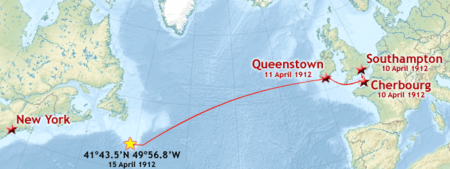

In [650]:
from IPython.display import Image
url = 'https://i0.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/5/51/Titanic_voyage_map.png/450px-Titanic_voyage_map.png'
Image(url,width=600, height=800)

In [651]:
# Group by survival rate and embarked
combined.groupby(['Survived', 'Embarked']).Embarked.count()

Survived  Embarked
0.0       C            75
          Q            47
          S           427
1.0       C            93
          Q            30
          S           217
Name: Embarked, dtype: int64

#### This is a little hard to read, let's try another way.

In [652]:
combined[['Embarked', 'Sex', 'Survived']].groupby(['Embarked', 'Sex']).mean()

Survived
Embarked Sex             
C        female  0.876712
         male    0.305263
Q        female  0.750000
         male    0.073171
S        female  0.689655
         male    0.174603

So it looks like Cherbourg has the highest survival rate out of the grouped attributes. So I will group the null values of the two to be from Cherbourg.

We can use the fillna() function to input the 'C' values where Embarked is null.

### Using value_counts(normalize=True) to get frequency percentage

In [653]:
round(combined.Embarked.value_counts(normalize=True)*100,2)

S    69.93
C    20.66
Q     9.41
Name: Embarked, dtype: float64

In [654]:
combined['Embarked'].fillna('C', inplace=True) # Using inplace() for memory

In [655]:
combined.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
Embarked          0
DataType          0
dtype: int64

Let's take a look visually now that we have all values in the feature populated. We can use matplotlib and its functions to:
1. Create a figure space
2. Plot the data
3. Update any figure settings

**Before modeling, create plots togther in 1 figure space that will pair up the train vs. test distributions to see if distributions vary a lot.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F33E450B8>,
      dtype=object)

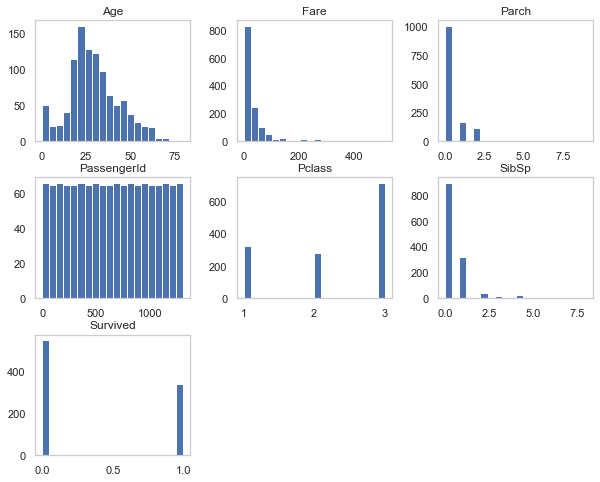

In [656]:
sns.set_style('whitegrid')
combined.hist(bins=20, figsize=(10,8), label='DataType', grid=False)

(figure out how to get the density plots) **************************************************

### Embarked box plot

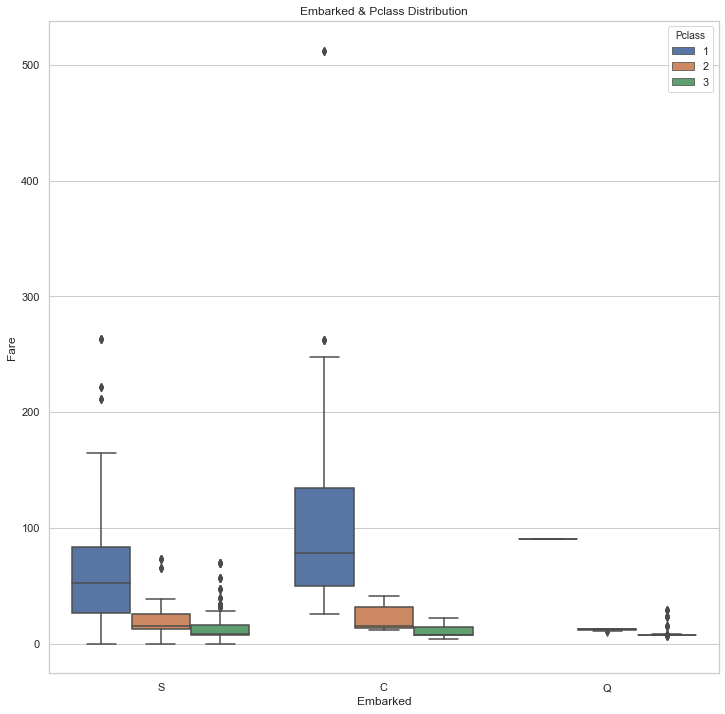

In [657]:
# Use either plt.figure() or plt.subplots()
fig, ax = plt.subplots(figsize=(12,12)) # ncols=1, nrows=1

# Step 2: Figure out what type of plots to use
ax1 = sns.boxplot(x='Embarked',
                  y='Fare',
                  hue='Pclass',
                  data=combined)
                  #ax=ax[0])

# Step3: Set any figure settings
ax1.set_title('Embarked & Pclass Distribution', fontsize=12)

'''Show figure'''
plt.show()

### Embarked count plot

Another plot that will show counts survival counts are greater than deaths in Cherbourg.

Some steps to get familiar with:
1. Create any argument dictionaries/lists like colors
2. Set grid/plot style using sns.set()
3. Set figure size if needed
4. Create figure using plt functions or base functions
5. Adjust any plot features like title, xlabel, ylabel, legend

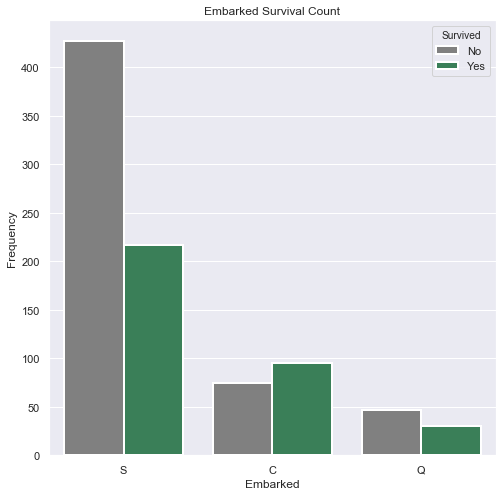

In [658]:
# Create color palette
colors = {1:'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Set figure size
fig = plt.figure(figsize=(8,8)) # ncols=1, nrows=1

# Create countplot()
ax = sns.countplot(x='Embarked',
                  hue='Survived',
                  data=combined,
                  linewidth=2,
                  palette=colors)

# Set titles and labels
plt.title('Embarked Survival Count')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

# Add legend and set
legend = ax.get_legend()
legend.set_title('Survived')
legend_txt = legend.texts
legend_txt[0].set_text('No')
legend_txt[1].set_text('Yes')

### Defining functions that will plot a table and graph

Found this from eraaz1 kernel which is neat, still have trouble getting two plots to show.

In [659]:
def pct_bar_labels():
    '''
    Function to label on top of the bar plot of relative frequency
    '''
    # Set font size
    font_size=12
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency: (%)', fontsize=font_size)
    plt.xticks(rotation=0, fontsize=font_size)
    plt.yticks([])
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=font_size, color='black')
    
def freq_table(var):
    '''
    Define global variables
    Create function that will populate a frequency table with %
    First get the counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100,2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Set figure
    fig_size=(15,8)
    font_size=12
    title_size=15
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels()
    plt.show()

### Use the new function to plot Embarked feature

Frequency of Embarked :


Count  Percentage
S    914       69.82
C    272       20.78
Q    123        9.40

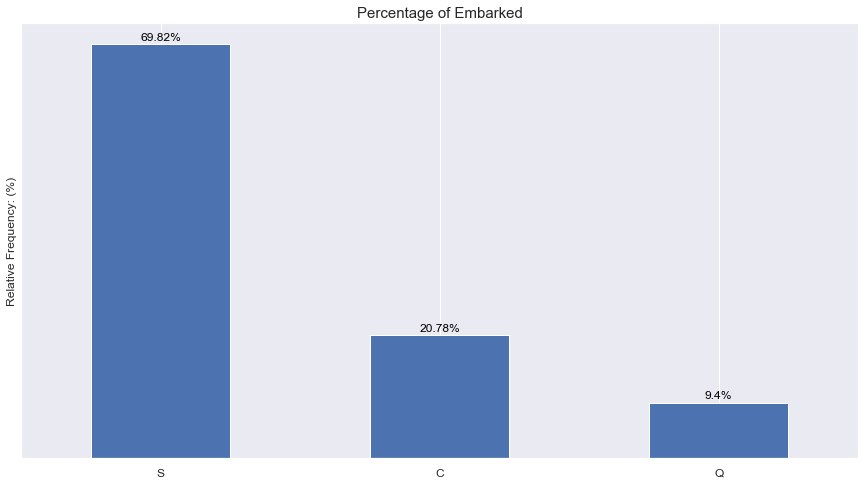

In [660]:
freq_table(combined.Embarked)

### Cabin feature

This is one feature that has a lot of nulls so we should take a look at it deeper to see what we can do with it.
1. How many nulls are there?
2. Can we infer anything from the feature?

In [661]:
# Get null count
cabin_freq = combined.Cabin.isnull().sum()

# Get proportion of null count
cabin_pct = round(combined.Cabin.isnull().sum()/len(combined)*100,2)

'''
Could also do a concat like this:

    cabin_freq.columns=['Frequency']
    cabin_pct.columns=['Percentage']

    pd.concat([cabin_freq, cabin_pct], axis=1)

Other tips: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
'''

# Create df
cabin_df = pd.DataFrame({'Nulls': cabin_freq,
                         'Percnt': cabin_pct},
                         columns=['Null Count', 'Percentage'],
                         index=[0])

# Print cabin_df type
print(type(cabin_df))

# Print output
cabin_df

<class 'pandas.core.frame.DataFrame'>


Null Count Percentage
0        NaN        NaN

In [662]:
print('Cabin Missing Values Proportion: ' + str(combined.Cabin.isnull().sum()/len(combined.Cabin)*100))

Cabin Missing Values Proportion: 77.46371275783041


Getting NaN values above so I need to look into that. The Cabin feature has a lot of null values the first thought for me is to remove it but there can always be something useful that is not shown.

- We can either not use this feature at all
- Discover methods to utilize feature engineering to make it usable
- Ask questions like:
    - Why are there so many missing Cabin values?
    - Survival rate of people with Cabins?
    - Socioeconomic status of Cabins?
    - Cabins closest to lifeboats?

We can see if we can group the fares with the cabin's letter.

In [663]:
# First we have to fill in the missing values so we don't get a subscriptable error
combined.Cabin.fillna('N', inplace=True)

# Loop through every row
combined['CabinValue'] = [i[0] for i in combined.Cabin]
combined.CabinValue[0:5]

0    N
1    C
2    N
3    C
4    N
Name: CabinValue, dtype: object

In [664]:
# Summarize cabin counts
combined.groupby('CabinValue').size().sort_values(ascending=False) # groupby()'s equivalent for value_counts()

CabinValue
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
dtype: int64

In [665]:
# Average fare per cabin letter
cvfare = combined.groupby('CabinValue')['Fare'].mean().sort_values(ascending=False)

cvfare_df = pd.DataFrame(cvfare)

# cvfare_df.reset_index(inplace=True)
# cvfare_df.set_index('CabinValue', drop=False, inplace=True)

cvfare_df

Fare
CabinValue            
B           122.383078
C           107.926598
E            54.564634
D            53.007339
A            41.244314
T            35.500000
N            19.132707
F            18.079367
G            14.205000

In [666]:
# Group it alongside with Survived
combined[['CabinValue', 'Survived']].groupby(['CabinValue']).mean().sort_values(ascending=False, by='Survived')

Survived
CabinValue          
D           0.757576
E           0.750000
B           0.744681
F           0.615385
C           0.593220
G           0.500000
A           0.466667
N           0.299854
T           0.000000

In [667]:
combined.head()

Age Cabin DataType Embarked     Fare  \
0  22.0     N    Train        S   7.2500   
1  38.0   C85    Train        C  71.2833   
2  26.0     N    Train        S   7.9250   
3  35.0  C123    Train        S  53.1000   
4  35.0     N    Train        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket CabinValue  
0       3    male      1       0.0         A/5 21171          N  
1       1  female      1       1.0          PC 17599          C  
2       3  female      0       1.0  STON/O2. 3101282          N  
3       1  female      1       1.0            113803          C  
4       3    male      0       0.0            373450          N

Surprisingly the survival rate isnt as correlated with the fares as I thought. C has a pretty high rate but only 59% survived. B has an abnormally high average fare too and it has a high survival rate which makse sense. The next bests are E and D which have a little over 53 in fares before it takes another small dip. We can attempt a statistical method to see if there is a relevancy between the two features. 

In [668]:
# Data is still in order here...
combined.head()

Age Cabin DataType Embarked     Fare  \
0  22.0     N    Train        S   7.2500   
1  38.0   C85    Train        C  71.2833   
2  26.0     N    Train        S   7.9250   
3  35.0  C123    Train        S  53.1000   
4  35.0     N    Train        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket CabinValue  
0       3    male      1       0.0         A/5 21171          N  
1       1  female      1       1.0          PC 17599          C  
2       3  female      0       1.0  STON/O2. 3101282          N  
3       1  female      1       1.0            113803          C  
4       3    male      0       0.0            373450          N

### Plot cabin value

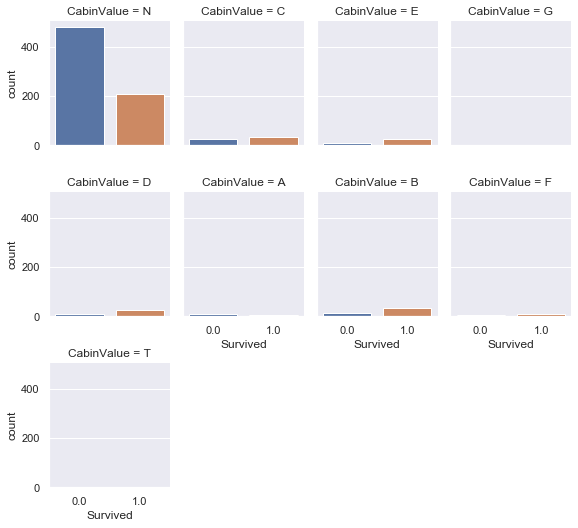

In [669]:
sns.catplot('Survived',
            col='CabinValue',
            col_wrap=4,
            data=combined[combined.CabinValue.notnull()],
            kind="count", height=2.5, aspect=.8)


### Create boxplots to see classes per cabin

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


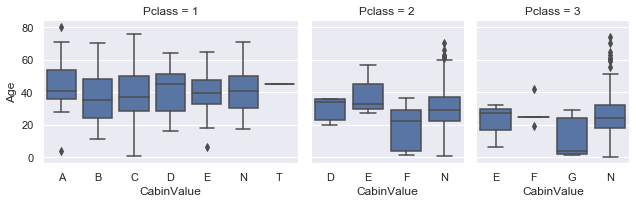

In [670]:
# Sort cabin values
combined_sorted = combined.assign(CabinValue=combined.CabinValue.astype(object)).sort_values('CabinValue')

# Create a facet grid
ax = sns.FacetGrid(combined_sorted,
                   col="Pclass",
                   sharex=False,
                   gridspec_kws={"width_ratios": [5, 3, 3]})

# Create boxplot
ax.map(sns.boxplot, "CabinValue", "Age")

Pclass definitely has more cabin options and the mean ages are higher as well.

### Some statistical tests

#### T-test
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

- Calculate the T-test for the means of two independent samples of scores.
- We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.
- Ex: stats.ttest_ind(rvs1,rvs2, equal_var = False)

#### ANOVA
The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.
- If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (scipy.stats.kruskal) although with some loss of power.
- Ex: stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

#### Linear regression
This test works as well and is a lot easier to implement.

Fare = dependent variable (numerical)

CabinValue = independent variable (categorical)

In [671]:
# Breaks here
combined.head()

Age Cabin DataType Embarked     Fare  \
0  22.0     N    Train        S   7.2500   
1  38.0   C85    Train        C  71.2833   
2  26.0     N    Train        S   7.9250   
3  35.0  C123    Train        S  53.1000   
4  35.0     N    Train        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket CabinValue  
0       3    male      1       0.0         A/5 21171          N  
1       1  female      1       1.0          PC 17599          C  
2       3  female      0       1.0  STON/O2. 3101282          N  
3       1  female      1       1.0            113803          C  
4       3    male      0       0.0            373450          N

In [672]:
# Import the test method from scipy
import scipy.stats as stats

# Average fare per cabin letter
cv_data = combined.CabinValue
fare_data = combined.Fare

# Group fare data by cabin value
cvfare_df = pd.DataFrame({"CabinValue":cv_data, "Fare":fare_data})
groups = cvfare_df.groupby("CabinValue").groups
groups

# Extract individual groups
B_grp = fare_data[groups['B']]
C_grp = fare_data[groups['C']]
E_grp = fare_data[groups['E']]
D_grp = fare_data[groups['D']]
A_grp = fare_data[groups['A']]
T_grp = fare_data[groups['T']]
N_grp = fare_data[groups['N']]
F_grp = fare_data[groups['F']]
G_grp = fare_data[groups['G']]

# ANOVA
stats.f_oneway(B_grp, C_grp, E_grp, D_grp, A_grp, T_grp, N_grp, F_grp, G_grp)

F_onewayResult(statistic=nan, pvalue=nan)

Well, looks like my statistical analysis needs some reviewing... let's try a linear regression.

In [673]:
# Breaks here
combined.head()

Age Cabin DataType Embarked     Fare  \
0  22.0     N    Train        S   7.2500   
1  38.0   C85    Train        C  71.2833   
2  26.0     N    Train        S   7.9250   
3  35.0  C123    Train        S  53.1000   
4  35.0     N    Train        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket CabinValue  
0       3    male      1       0.0         A/5 21171          N  
1       1  female      1       1.0          PC 17599          C  
2       3  female      0       1.0  STON/O2. 3101282          N  
3       1  female      1       1.0            113803          C  
4       3    male      0       0.0            373450          N

In [674]:
# Import model and perform linear regression
'''
With .fit(), you calculate the optimal values of the weights ùëè‚ÇÄ and ùëè‚ÇÅ, using the existing input and output (x and y) 
as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. 

Get new dataframe without the null value: combined[combined['Fare'].notnull()].Fare.isnull().sum()
'''

from sklearn.linear_model import LinearRegression

# Drop NA fare
cv_fare_combined = combined[combined['Fare'].notnull()]

# Get x and y variables
fare_y = pd.DataFrame(cv_fare_combined.Fare, columns=['Fare'])
cv_x = cv_fare_combined.CabinValue
cv_x = pd.DataFrame((i for i in cv_x), columns=['CabinVal'])
cv_x_copy = cv_x.copy()

# Get dummies
cv_x = pd.get_dummies(cv_x, columns=['CabinVal'])
                                           
# Fit and score the model
lm = LinearRegression().fit(cv_x, fare_y)
lm_score = lm.score(cv_x, fare_y)

# Print coefficients
print('Linear Regression Score: ' + str(lm_score))
print('Intercept: ' + str(lm.intercept_))
print('Coefficient: ' + str(lm.coef_))

Linear Regression Score: 0.36704455147123405
Intercept: [8.64005398e+14]
Coefficient: [[-8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14 -8.64005398e+14 -8.64005398e+14 -8.64005398e+14
  -8.64005398e+14]]


It looks like there isn't a strong association between the fare feature and the cabin feature.

In [675]:
# Get count of a dataframe column
cv_x_copy['CabinVal'].value_counts()

# Print data info
print(type(cv_x))
print(type(fare_y))
print(type(cv_x.info()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 9 columns):
CabinVal_A    1308 non-null uint8
CabinVal_B    1308 non-null uint8
CabinVal_C    1308 non-null uint8
CabinVal_D    1308 non-null uint8
CabinVal_E    1308 non-null uint8
CabinVal_F    1308 non-null uint8
CabinVal_G    1308 non-null uint8
CabinVal_N    1308 non-null uint8
CabinVal_T    1308 non-null uint8
dtypes: uint8(9)
memory usage: 11.6 KB
<class 'NoneType'>


Let's look at the median values instead of the mean since there might be skewness involved.

In [676]:
combined.groupby('CabinValue')['Fare'].median().sort_values(ascending=False)

CabinValue
C    86.2896
B    82.2667
E    53.1000
D    52.5542
T    35.5000
A    35.0771
G    16.7000
F    13.0000
N    10.5000
Name: Fare, dtype: float64

In [677]:
# Create a function to group cabins
def cabin_grouping(x):
    letter = 0
    if x<16:
        letter='G'
    elif x>=16 and x<26:
        letter='F'
    elif x>=27 and x<38:
        letter='T'
    elif x>=38 and x<47:
        letter='A'
    elif x>=47 and x<53:
        letter='E'
    elif x>=53 and x<54:
        letter='D'
    elif x>=54 and x<116:
        letter='C'
    else:
        letter='B'
    return letter

In [678]:
# Apply the cabin function into each unknown cabins
combined['CabinValue'] = combined.Fare.map(lambda x:cabin_grouping(x))
combined.drop('Cabin', axis=1, inplace=True)

combined.shape

(1309, 13)

### Fare feature

There is one null value.

In [679]:
combined[combined.isnull().Fare]

Age DataType Embarked  Fare                Name  Parch  PassengerId  \
152  60.5     Test        S   NaN  Storey, Mr. Thomas      0         1044   

     Pclass   Sex  SibSp  Survived Ticket CabinValue  
152       3  male      0       NaN   3701          B

We can do a dirty method and just add in an average failure for the passenger type based on cabin, age, sex, etc.

In [680]:
# Get attributes and index the values to get the mean
missing_fare = round(combined[(combined.Pclass==3) & (combined.Embarked=='S') & (combined.Sex=='male')].Fare.mean(),2)
print('Avg Fare for Pclass = 3, Embarked = S, Sex = M: ' + str(missing_fare))

# Replace null fare
combined.Fare.fillna(missing_fare, inplace=True)

Avg Fare for Pclass = 3, Embarked = S, Sex = M: 13.15


### Fare - jitter

Text(0.5, 1.0, 'Fare Distribution vs. Pclass')

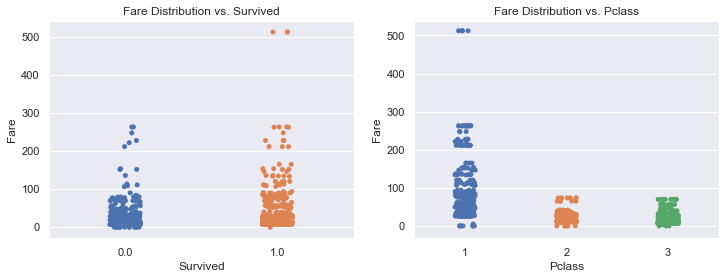

In [681]:
# Create figure space
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

ax1 = sns.stripplot(x="Survived",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[0])

ax2 = sns.stripplot(x="Pclass",
                    y="Fare",
                    data=combined,
                    jitter=True,
                    ax=ax[1])

# Set figure features
ax1.set_title('Fare Distribution vs. Survived')
ax2.set_title('Fare Distribution vs. Pclass')

Looks like there are a few fare outliers that can skew the data. We will most likely standardized the entire dataset before modeling.

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


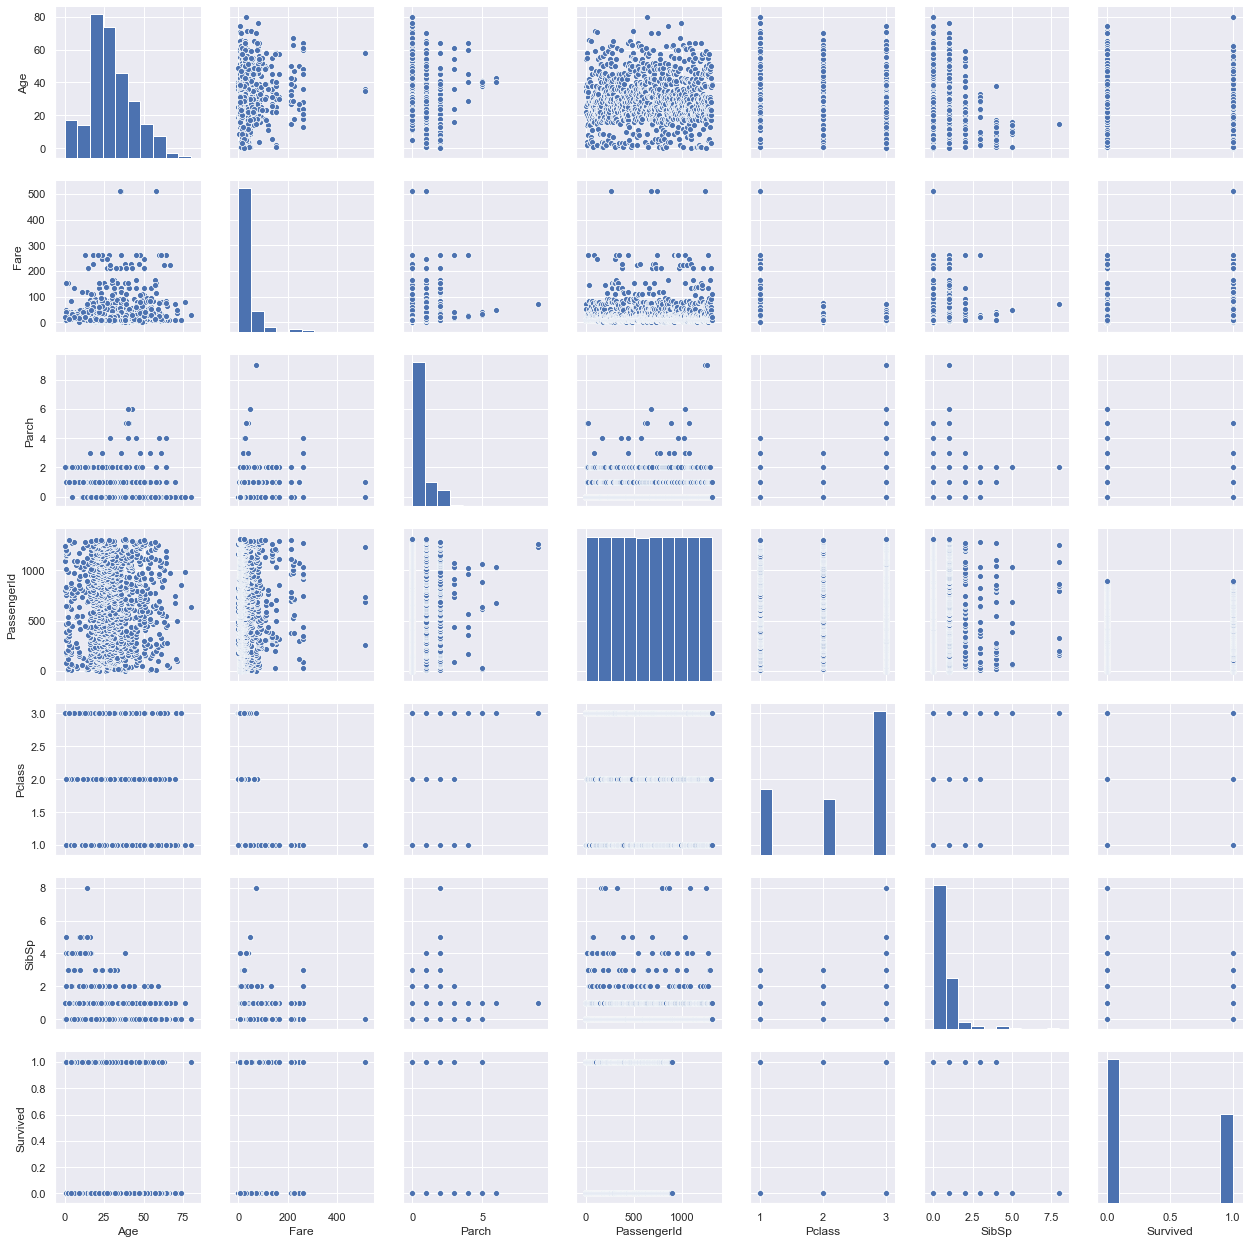

In [682]:
# This will take awhile to load up if the dataset is large
sns.pairplot(combined) # ggpairs() in R

Text(0.5, 1.0, 'Survived vs. Fare BoxPlot')

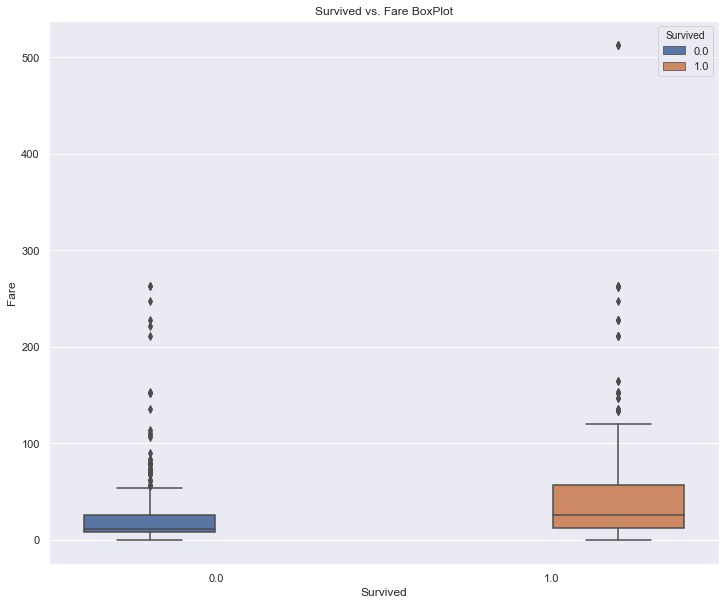

In [683]:
# A boxplot would be able to see where the quartiles end
fig = plt.figure(figsize=(12,10))

# Create boxplot
ax = sns.boxplot(x='Survived',
                 y='Fare',
                 hue='Survived',
                 data=combined)

# Set figure features
ax.set_title('Survived vs. Fare BoxPlot')

The mean is higher when the fare is higher in survival rates. There could be information on whether a higher fare price may affect the chance of survival especially with special titles.

### Create a density plot for Fare & Survived

Text(0, 0.5, 'Fare')

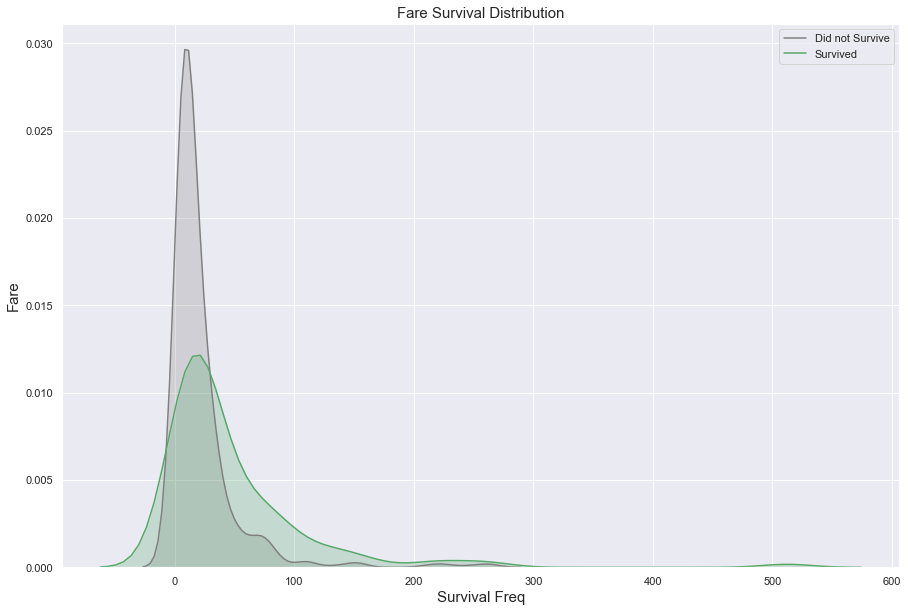

In [684]:
# Create a figure space, only need 1 we will overlap the densities
fig = plt.figure(figsize=(15,10))

# Create the density plots
ax = sns.kdeplot(combined.loc[(combined.Survived==0), 'Fare'],
#                  combined.Fare[combined.Survived==0],
                 color='gray',
                 shade=True,
                 label='Did not Survive'
                )

ax = sns.kdeplot(combined.loc[(combined.Survived==1), 'Fare'],
                 color='g',
                 shade=True,
                 label='Survived')

# Set plot features
plt.title('Fare Survival Distribution', fontsize=15)
plt.xlabel('Survival Freq', fontsize=15)
plt.ylabel('Fare', fontsize=15)

The plot also shows a similar spike like the lower class survival rate where the gray area is way above the shaded green region.

Looking proportionally, if you paid a good amount compared to the mean/median rate, you had a better chance of surviving.

7/9 people survived when the fare was 250.01 and above. After looking at these 9 people, the Fortune family may have held high socio-economic status as they were all in this fare range. The males died unfortunately, either saving their sisters or was just in the wrong area at the wrong time. 

In [685]:
# Get fare outliers
combined[combined.Fare>300]

Age DataType Embarked      Fare  \
258  35.0    Train        C  512.3292   
679  36.0    Train        C  512.3292   
737  35.0    Train        C  512.3292   
343  58.0     Test        C  512.3292   

                                                  Name  Parch  PassengerId  \
258                                   Ward, Miss. Anna      0          259   
679                 Cardeza, Mr. Thomas Drake Martinez      1          680   
737                             Lesurer, Mr. Gustave J      0          738   
343  Cardeza, Mrs. James Warburton Martinez (Charlo...      1         1235   

     Pclass     Sex  SibSp  Survived    Ticket CabinValue  
258       1  female      0       1.0  PC 17755          B  
679       1    male      0       1.0  PC 17755          B  
737       1    male      0       1.0  PC 17755          B  
343       1  female      0       NaN  PC 17755          B

### Plot without Fares < 150

This will help us see the distribution better.

Text(0, 0.5, 'ylabel')

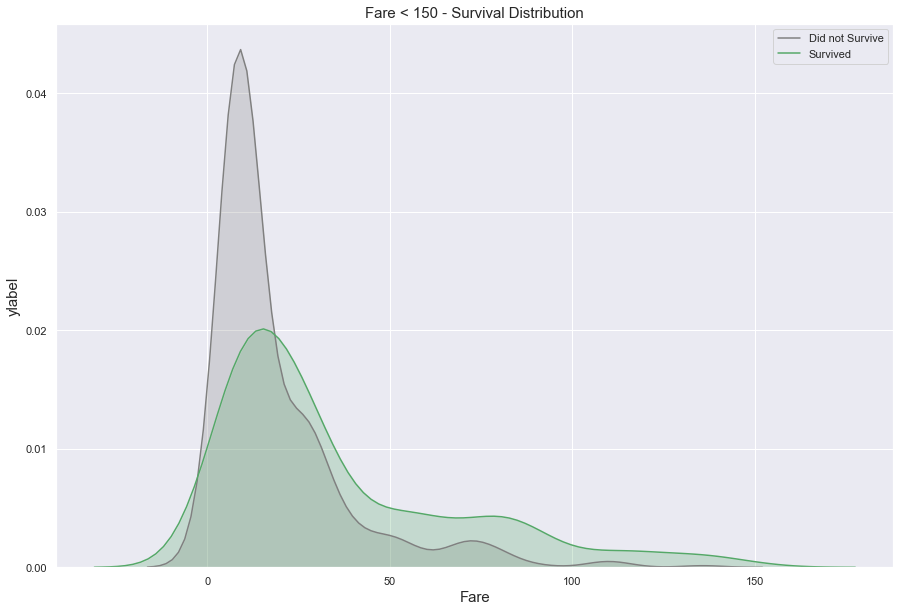

In [686]:
# Create figure space
fig = plt.figure(figsize=(15,10))

# Create kdeplots
ax = sns.kdeplot(combined.loc[((combined.Survived==0) & (combined.Fare<150)), 'Fare'],
                 color='gray',
                 shade=True,
                 label='Did not Survive'
                )

# Be sure to put parentheses; loc(row values, column name)
ax = sns.kdeplot(combined.loc[((combined.Survived==1) & (combined.Fare<150)), 'Fare'],
                 color='g',
                 shade=True,
                 label='Survived'
                )

# Set plot features
plt.title('Fare < 150 - Survival Distribution', fontsize=15)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('ylabel', fontsize=15)

### Age Feature

Our final feature that has NA values besides Survived (test data). Let's see how many there are.

In [687]:
# Print out the missing values
print('Missing values in the age feature: ' + str(round(combined.Age.isnull().sum()/len(combined)*100,1)) + str('%'))

Missing values in the age feature: 20.1%


Replacing it with a summary statistics may not be useful because age could determine the survival rate. Kids and older people have higher chance of survival. We could attempt to use an algorithm to see if we can model something for this feature instead. First let's plot some graphs to see how the distribution looks like for age.

Create multiple boxplots for Age.

Text(0.5, 1.0, 'Cabin vs. Age for Survival Rate')

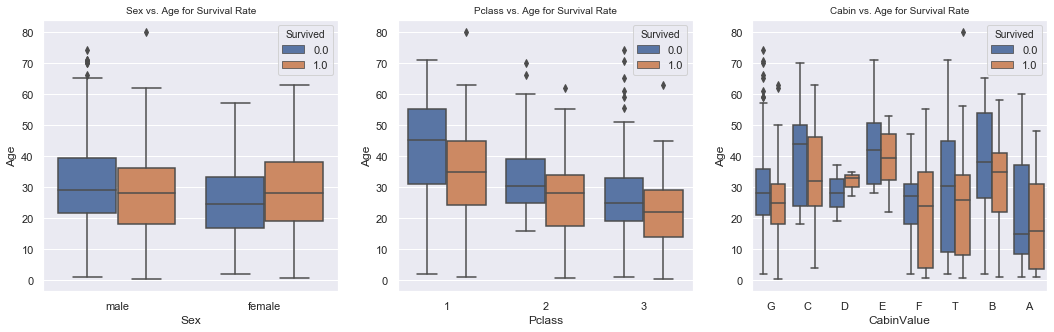

In [688]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Create plots
ax1 = sns.boxplot(x='Sex', y='Age', hue='Survived', data=combined, ax=ax[0])
ax2 = sns.boxplot(x='Pclass', y='Age', hue='Survived', data=combined, ax=ax[1])
ax3 = sns.boxplot(x='CabinValue', y='Age', hue='Survived', data=combined, ax=ax[2])

# Set plot features
ax1.set_title('Sex vs. Age for Survival Rate', fontsize=10)
ax2.set_title('Pclass vs. Age for Survival Rate', fontsize=10)
ax3.set_title('Cabin vs. Age for Survival Rate', fontsize=10)

Based on these three plots and some inferences made from my previous work on this dataset...

These following groups have a higher survival rate than normal:
- Female
- Kids
- Older Adults
- Higher socioeconomic status people (high fares, good cabins, pclass, etc.)
- More to come such as titles, family size, child groups

Text(0, 0.5, 'Survival Frequency')

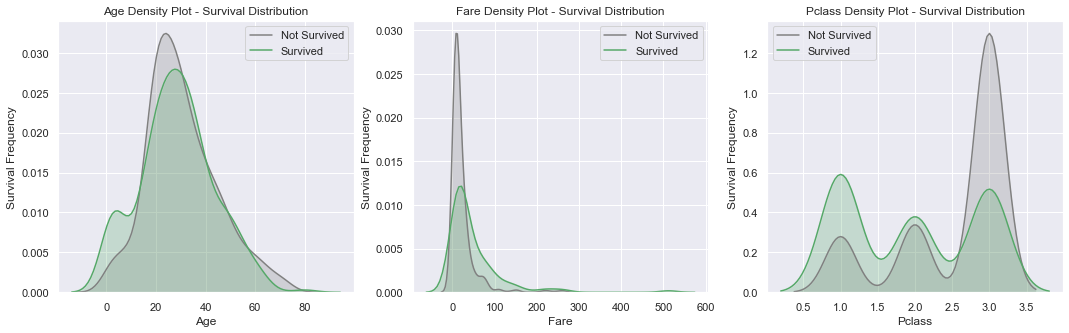

In [689]:
fig, ax = plt.subplots(figsize=(18,5), ncols=3, nrows=1)

# Check NA: combined.Age[combined.Age.notnull() & combined.Survived==1].isnull().sum()
ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[0])

ax1 = sns.kdeplot(combined.Age[(combined.Age.notnull()) & (combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[0])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[1])

ax2 = sns.kdeplot(combined.Fare[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[1])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==0)],
                  color='gray',
                  shade=True,
                  label='Not Survived',
                  ax=ax[2])

ax3 = sns.kdeplot(combined.Pclass[(combined.Survived==1)],
                  color='g',
                  shade=True,
                  label='Survived',
                  ax=ax[2])

# Set plot features (axes has to use .set_xlabel() instead of plt.xlabel())
ax1.set_title('Age Density Plot - Survival Distribution', fontsize=12)
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Survival Frequency', fontsize=12)

ax2.set_title('Fare Density Plot - Survival Distribution', fontsize=12)
ax2.set_xlabel('Fare', fontsize=12)
ax2.set_ylabel('Survival Frequency', fontsize=12)

ax3.set_title('Pclass Density Plot - Survival Distribution', fontsize=12)
ax3.set_xlabel('Pclass', fontsize=12)
ax3.set_ylabel('Survival Frequency', fontsize=12)

It looks like almost no age group besides children and infants survived more than death. We can assume that this group was a priority to get to safety and can also fit more into a lifeboat due to their size. 

Try to get the NA values out below. Fixed with parentheses. Was not getting the data before.

combined.Age[(combined.Age.notnull()) & (combined.Survived==0)].isnull().sum()

### Faceted histogram plots by Sex and Age

The idea of faceted plots is to visualize multiple variables and relationships at the same time. 

Create faceted barplots with the sex and age Features. In R, this could be done by using ggplot() and facet_grid(~Var) or in python with sns.FacetGrid() 

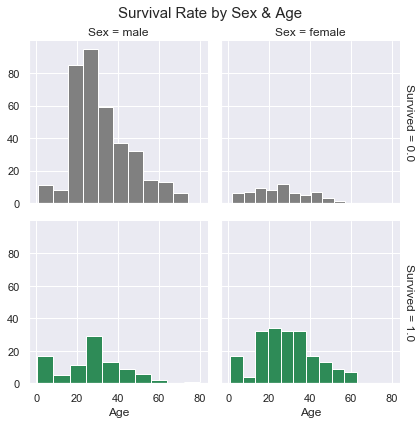

In [690]:
# Get colors for palette
colors = {1: 'seagreen', 0: 'gray'}

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Survived',
                   margin_titles=True,
                   hue='Survived',
                   palette=colors)

# Create plot using map()
ax = ax.map(plt.hist, 'Age', edgecolor='w')

# Set plot features
ax.fig.suptitle('Survival Rate by Sex & Age', size=15)
plt.subplots_adjust(top=0.90)

### Create a jitter plot on top of a box plot for Age

Text(0.5, 1.0, 'Survival Distribution by Age')

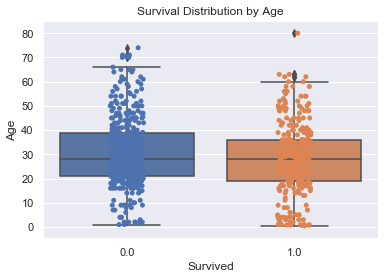

In [691]:
ax = sns.boxplot(x='Survived',
                 y='Age',
                 data=combined)

ax = sns.stripplot(x='Survived',
                   y='Age',
                   data=combined,
                   jitter=True,
                   edgecolor='w')

plt.title('Survival Distribution by Age', fontsize=12)

There is a slight indication from the chart showing that younger people has a higher chance of survival.

### Create a plot for Age distribution

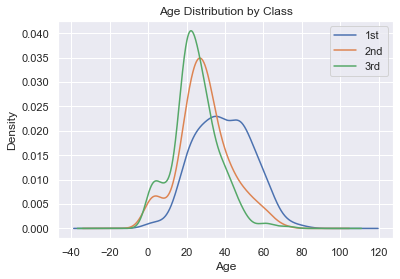

In [692]:
combined.Age[combined.Pclass==1].plot(kind='kde')
combined.Age[combined.Pclass==2].plot(kind='kde')
combined.Age[combined.Pclass==3].plot(kind='kde')

# Set plot features
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution by Class', fontsize=12)
plt.legend(('1st', '2nd', '3rd'), loc='best')

By looking at this plot we can assume that wealthier people tend to have a larger population boarding the ship. The younger has a strong unimodel shape peaking at around 20s and 30s.

### Sex feature

I believe this feature without any feature engineering would be the best feature to determine survival rate since it looks like females have a higher rate in general.

<Figure size 864x432 with 0 Axes>

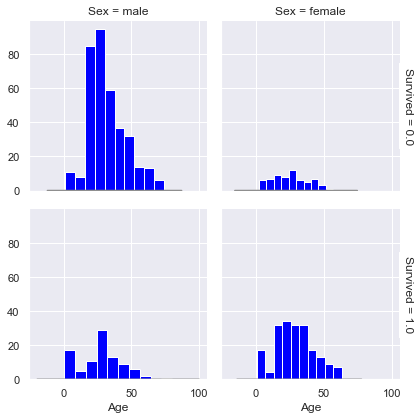

In [693]:
# Set figure space
fig = plt.figure(figsize=(12,6))

# Create facet plot
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Survived',
                   margin_titles=True)

# Create plot and plot features
ax.map(plt.hist, 'Age', color='blue')
ax.map(sns.kdeplot, 'Age', color='gray', shade=False)

As expected, males have a higher death rate just by looking at the top graphs. But just to be sure that it's not confirmation bias, continue to see different views of the data.

Text(0.5, 0.98, 'Gender & Age - Survival Distribution')

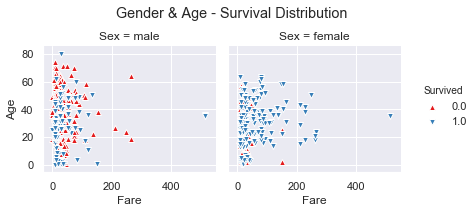

In [694]:
# Set figure space
# fig = plt.subplots(figsize=(12,8))

# Set facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   hue='Survived',
                   margin_titles=True,
                   palette='Set1',
                   hue_kws=dict(marker=["^", "v"]))

# Create plots
ax.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()
plt.subplots_adjust(top=0.80)
ax.fig.suptitle('Gender & Age - Survival Distribution')

Those fare outliers have been a couple together. Earlier the boxplots would show the points but we can safely assume so unless they were family.

In [695]:
# Create a gender/survival frequency distribution table
sex_survived = pd.crosstab(index=combined['Survived'],
                           columns=combined['Sex'],
                           margins=True)

sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']
sex_survived.columns = ['F', 'M', 'RowTotal']

# Distribution for total
print(round(sex_survived/sex_survived.loc['ColTotal', 'RowTotal']*100,1))

# Distribution for gender
round(sex_survived/sex_survived.loc['ColTotal']*100,1)

                    F     M  RowTotal
Did not Survive   9.1  52.5      61.6
Survived         26.2  12.2      38.4
ColTotal         35.2  64.8     100.0


F      M  RowTotal
Did not Survive   25.8   81.1      61.6
Survived          74.2   18.9      38.4
ColTotal         100.0  100.0     100.0

(Survived - Females) is the the second highest combination of the two features right after (Did not Survive - Males). There is also an inverse relation to the proportion as well as most females survived but most males did not survive. Most males died but most females survived.

### Sex Bar Plot

Frequency of Sex :


Count  Percentage
male      843        64.4
female    466        35.6

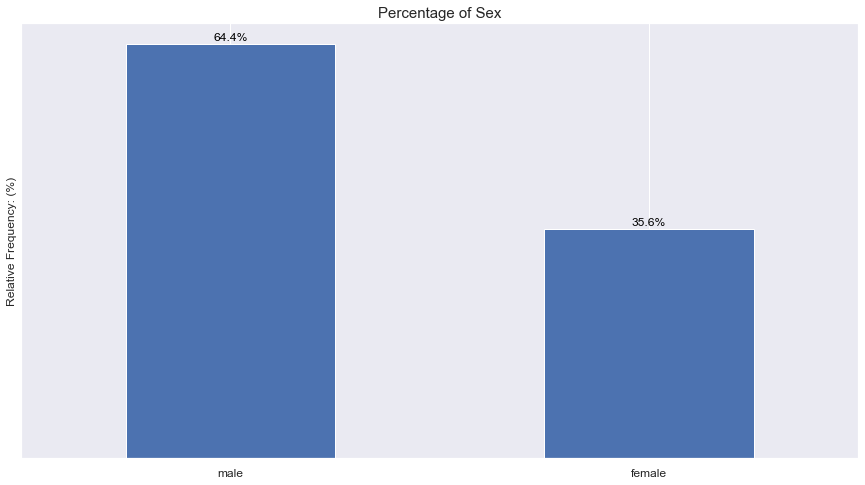

In [696]:
# Using the function created earlier, create a quick visual
freq_table(combined.Sex)

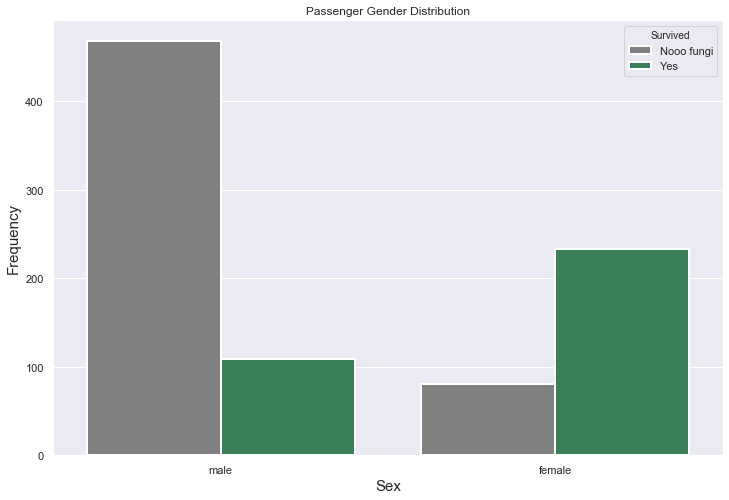

In [697]:
# Let's break it down
colors = {1: 'seagreen', 0: 'gray'}

# Set plot style using sns.set()
sns.set(style='darkgrid')

# Create figure space
plt.subplots(figsize=(12,8))

# Create countplot(); does not need a y variable since it's counting
ax = sns.countplot(x='Sex',
                   hue='Survived',
                   data=combined,
                   linewidth=2,
                   palette=colors)

# Set plot features (plt.title vs. ax.set_title)
ax.set_title('Passenger Gender Distribution')
ax.set_xlabel('Sex', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

# Add legend and rename text
ax_legend = ax.get_legend()
ax_legend.set_title('Survived')
ax_legend_text = ax_legend.texts
ax_legend_text[0].set_text('Nooo fungi')
ax_legend_text[1].set_text('Yes')

# Show
plt.show()

Again, as you can see from the plot above, females have a higher survival rate vs non-survival rate. If you're a female, your chances are going to be a lot higher than the males. Hopefully the model will catch this when we start using the features and plot variable importance

### Create a faceted plot with Embarked & Sex

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

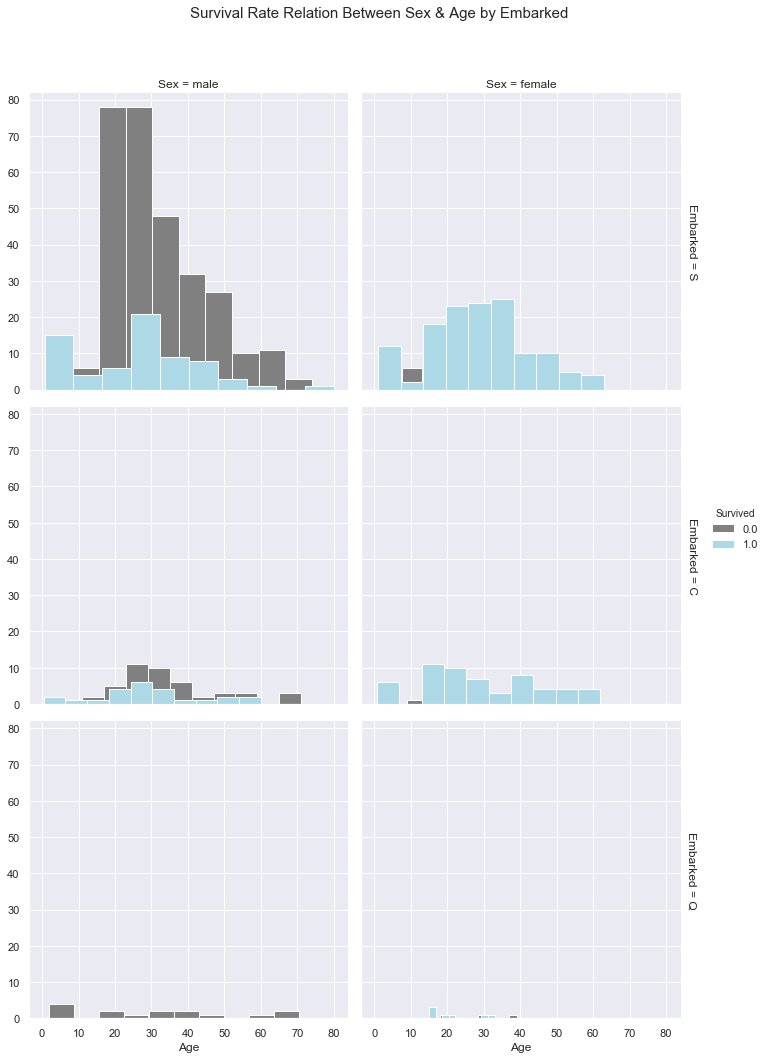

In [698]:
# Set colors
colors = {1: 'lightblue', 0: 'gray'}

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   row='Embarked',
                   height=5, 
                   margin_titles=True,
                   hue='Survived',
                   palette=colors)

# Use map() on the facet grid
ax = ax.map(plt.hist, 'Age', edgecolor='w')
ax_legend = ax.add_legend()
ax.set_titles("{col_name} Test")

# Set plot features
ax.fig.suptitle('Survival Rate Relation Between Sex & Age by Embarked', size=15)

# Move title
plt.subplots_adjust(top=0.90)

Another illustration between embarked locations with gender facets. Like we saw previously, females have a higher survival rate and it definitely shows here per location.

With that being said, what else can we see from these charts?
- We can also see that the location 'S' which is Southampton has majority of the passengers with the least being Queenstown (Q). 
- Unless we zoom into the chart for Queenstown, it looks like there were no male survivors.
- Cherbourg (C) has a high survival rate distribution according to the plot. 

### Scatterplot for Sex, Age & Fare

Let's use plt.scatter() to see individual points.

<Figure size 1080x720 with 0 Axes>

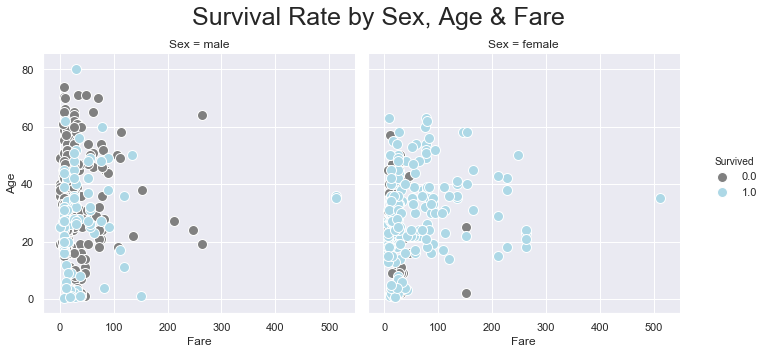

In [699]:
# Create a figure
fig = plt.figure(figsize=(15,10))

# Create facet grid
ax = sns.FacetGrid(combined,
                   col='Sex',
                   hue='Survived',
                   margin_titles=True,
                   palette=colors,
                   height=5) # insert arg value for sizes

# Create scatter
ax.map(plt.scatter, 'Fare', 'Age', edgecolor='w', s=100)

# Add a legend
ax.add_legend()

# Set plot features
ax.fig.suptitle('Survival Rate by Sex, Age & Fare', size=25)
plt.subplots_adjust(top=0.85)

Outliers could be seen with the points that are above 500. We can either plot without them to see the distribution better.

##### Some Steps to follow
1. Create figure space
2. Create facetGrid()
3. Create plot by plt.plot or snsplot()
4. Set titles, legends, etc.
    - Get familiar with the parameters
5. Show plot

### Pclass feature

An assumption would be that higher class passengers would have higher survival rates than lower classed passengers.

We can order and set colors for the bar plot as well. It's already ordered so we don't need to but if if there was a specific order then use the order parameter in sns.barplot(order=['',''])

([<matplotlib.axis.XTick at 0x23f37549710>,
 <a list of 3 Text xticklabel objects>)

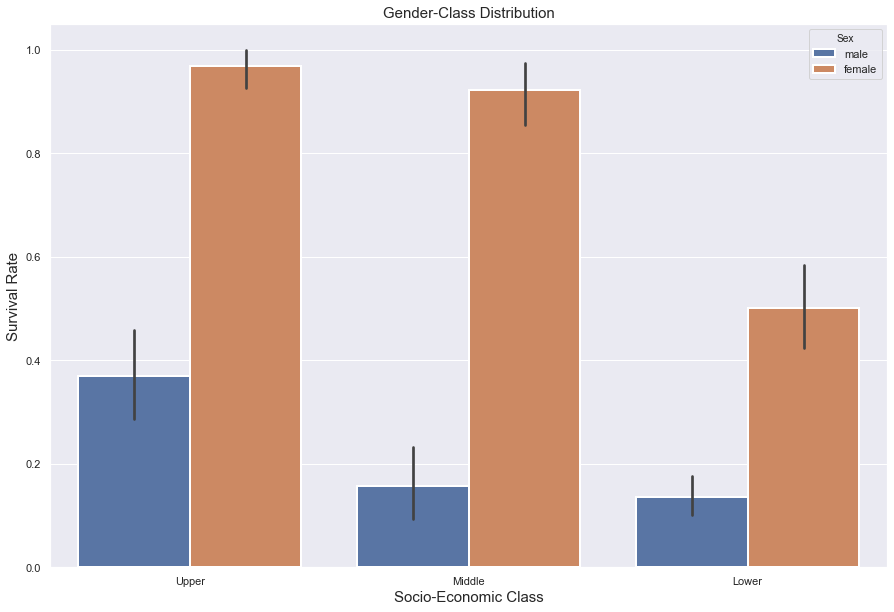

In [700]:
# Create figure space
plt.subplots(figsize=(15,10)) # plt.figure()

# Create colors
p_colors = {1: 'seagreen', 2: 'lightblue', 3: 'orange'}

# Create a bar plot
ax = sns.barplot(x='Pclass',
                 y='Survived',
                 hue='Sex',
                 data=combined,
#                  palette='Blues_d',
                 linewidth=2)
#                  order=['','','']

# Set plot features
ax.set_title('Gender-Class Distribution', fontsize=15)
ax.set_xlabel('Socio-Economic Class', fontsize=15)
ax.set_ylabel('Survival Rate', fontsize=15)

# Set xlabel values
labels = ['Upper', 'Middle', 'Lower']
val = [0,1,2]
plt.xticks(val, labels)

Plot should be faceted by Pclass when done correctly


c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


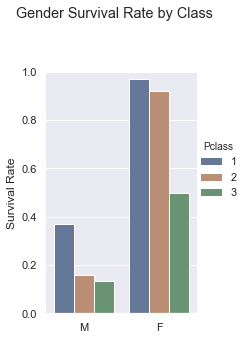

In [701]:
# Create a similar plot but have automated titles
ax = sns.factorplot(x='Sex',
                    y='Survived',
                    hue='Pclass',
                    data=combined,
                    saturation=0.50,
                    kind='bar',
                    ci=None,
                    aspect=0.60)

# Set plot features
(ax.set_axis_labels('', 'Survival Rate')
    .set_xticklabels(['M','F'])
    .set_titles('{col_name} {col_var}')
    .set(ylim=(0, 1))
    .despine(left=True))

plt.subplots_adjust(top=0.80)
ax.fig.suptitle('Gender Survival Rate by Class')

print('Plot should be faceted by Pclass when done correctly')

Note: Using catplot() is safer than using FacetGrid() directly, as it ensure synchronization of variable order across facets

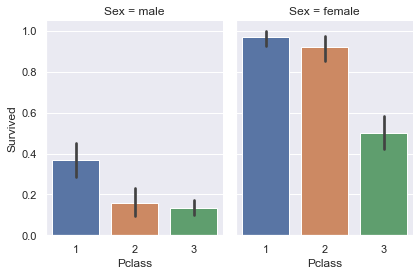

In [702]:
# Another type of plot
ax = sns.catplot(x='Pclass',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 kind='bar',
                 height=4,
                 aspect=0.75)

The plot above indicates that if you are a female within Pclass of 1 or 2, the chance of survival is way above 80%. If you are in Pclass & a female, the chances of survival skyrockets close to 100%. Let's see this in a table if the plot is correct.

In [703]:
pclass_sex_survived = pd.crosstab(index=combined.Survived,
                                  columns=[combined.Pclass, combined.Sex],
                                  margins=True)

pclass_sex_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_sex_survived/pclass_sex_survived.loc['ColTotal']*100,1)

Pclass               1             2             3           All
Sex             female   male female   male female   male       
Did not Survive    3.2   63.1    7.9   84.3   50.0   86.5   61.6
Survived          96.8   36.9   92.1   15.7   50.0   13.5   38.4
ColTotal         100.0  100.0  100.0  100.0  100.0  100.0  100.0

- 96.8% and 92.1% survival rates within that group.
- Highest death rate would be males in Pclass of 3 then Pclass of 2.

So another assumption would be that if you were a female in a high socio-economic status based on Pclass then your survival rate goes way up.

### Create a kernel density plot by Pclass & Sex

Parameters to use: data, color, shade, label

([<matplotlib.axis.XTick at 0x23f3cef3c18>,
 <a list of 3 Text xticklabel objects>)

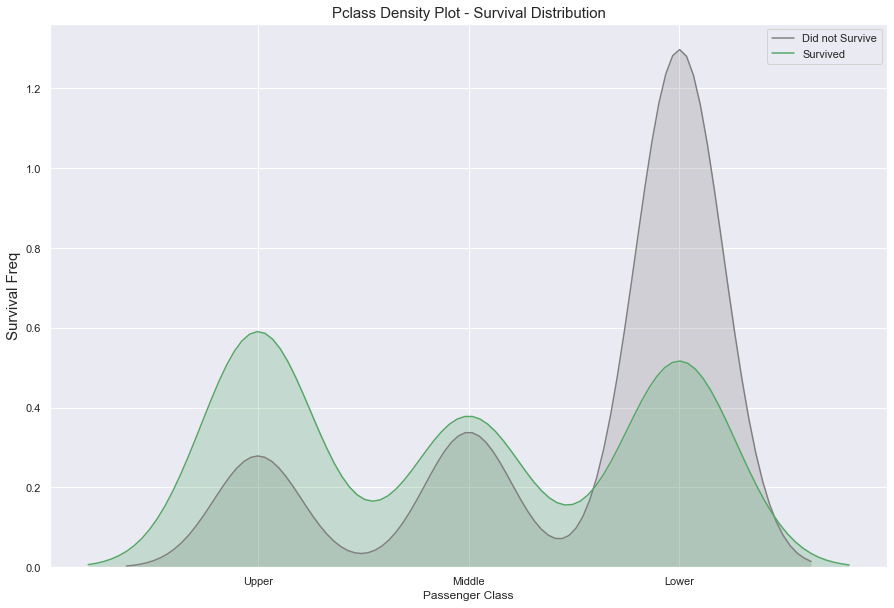

In [704]:
# Create a figure space
fig = plt.figure(figsize=(15,10))

# Create 2 kdeplots (one of each Survived group)
ax1 = sns.kdeplot(combined.Pclass[combined.Survived==0],
                  color='gray',
                  shade=True,
                  label='Did not Survive')

ax1 = sns.kdeplot(combined.Pclass[combined.Survived==1],
                  color='g',
                  shade=True,
                  label='Survived')

# Set plot features
ax1.set_title('Pclass Density Plot - Survival Distribution', fontsize=15)
ax1.set_xlabel('Passenger Class', fontsize=12)
ax1.set_ylabel('Survival Freq', fontsize=15)

# Set xtick labels
labels = ['Upper', 'Middle', 'Lower']
# plt.xticks(sorted(combined.Pclass.unique()), labels)
plt.xticks([1,2,3], labels)

Take a look at this and check out the difference between the top of the gray density shading vs the green shading. The difference is much higher in the Lower class vs. the Upper where it is actually negative or positive depending on how you see the graph.

### Parch feature

A larg parch size could mean no survival or less survival due to the fact that no one wants to be left behind. When members are within a vicinity or not, search can continue vs someone who may be alone or have just one person that they are alongside at most time so hopefully the escape process is a lot faster and more efficient. 

### Create a factor plot for Parch
The new catplot function provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables.

_________________________________ 

#### Notes - Tutorials

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/

- kind parameter argument values: point, bar, violin, box, boxen
- jitter parameter: numerical value ('0.25')

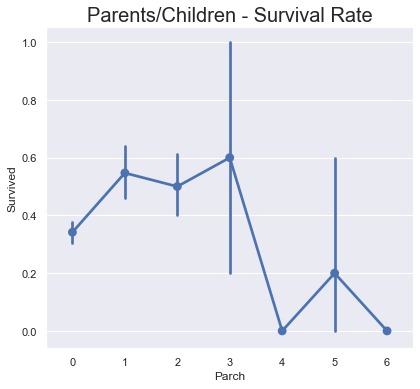

In [705]:
# Plot without high fare outliers
sns.catplot(x='Parch',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='point',
            height=6) 

# Set plot features
plt.title('Parents/Children - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Passengers who traveled in small groups with siblings/spouses had higher survival rates than other passengers as shown in the plot above. There is a decline as the numbers get higher after 1 sibling/spouse.

What can be inferred from this?
- Movement to safety is a lot easier when there are less people
- Larger groups tend to try to do initial search for their family members/loved ones longer than smaller groups
- The longer you wait the higher chance of death (waiting = search, waiting)

Catplot also have other plot shapes as well, try them out.

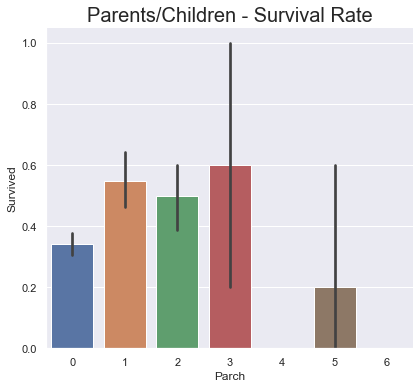

In [706]:
# Plot without high fare outliers
sns.catplot(x='Parch',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='bar',
            height=6) 

# Set plot features
plt.title('Parents/Children - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

### Create a factor plot for SibSP

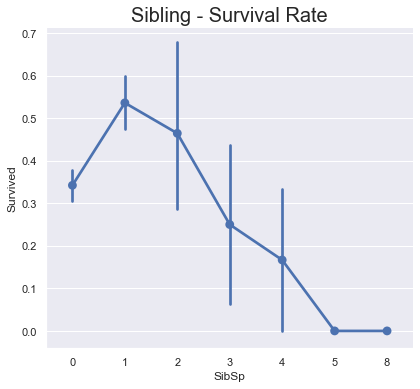

In [707]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='point',
            height=6)

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Plot shows a similar shape like the Parch feature. The higher the number usually indicates a lower survival rate.

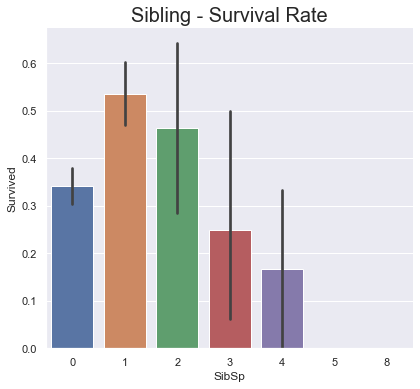

In [708]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='bar',
            height=6) 

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

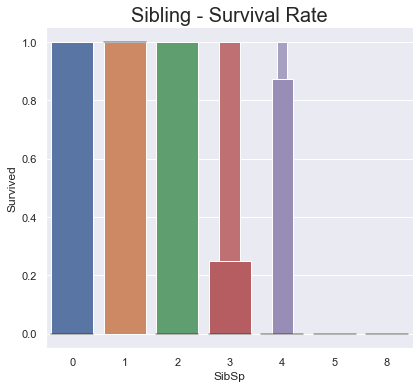

In [709]:
sns.catplot(x='SibSp',
            y='Survived',
            data=combined[(combined.Fare<500) & combined.Survived.notnull()],
            kind='boxen',
            height=6) 

# Set plot features
plt.title('Sibling - Survival Rate', fontsize=20)
plt.subplots_adjust(top=0.85)

Now that we have a better idea of the distributions of the passengers, we can work on some feature engineering to help the model and clean up any other features like Age.

### Let's create a new feature from Sex called Gender to be numerical

In [710]:
combined['Gender'] = combined.Sex.map(lambda x: 0 if x=='female' else 1)

# Check
combined.Gender.head()

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

### name_length, length_group new features

Create a new feature called name_length that will count the letters in each name. As stated in my previous work, this is a new one to me when going through kernels. I definitely want to see the feature importance on this one. 

Loop through the Name feature and create a length_group feature based on the count.

In [711]:
# Loop through each index position in the name and sum
combined['name_length'] = [len(i) for i in combined.Name]

# Define a new function to group the name length
def create_name_length_group(size):
    term=''
    if size<20:
        term='short'
    elif size<=35:
        term='medium'
    elif size<=45:
        term='good'
    else:
        term='long'
    return term

# Map the new function to create a new length_group feature
combined['length_group'] = combined.name_length.map(create_name_length_group)

# Check: get multiple column names by using double [[name, name]]
combined[['name_length', 'length_group']].head()

name_length length_group
0           23       medium
1           51         long
2           22       medium
3           44         good
4           24       medium

### Create a factor plot of length_group

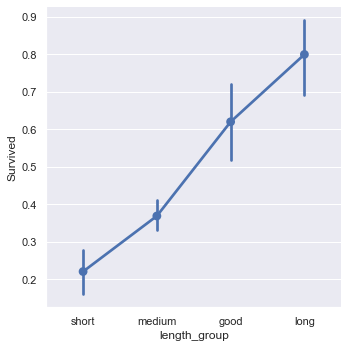

In [712]:
sns.catplot(x='length_group',
            y='Survived',
            data=combined,
            kind='point',
            order=['short', 'medium', 'good', 'long'])

If this is actually true, the longer name you have, the higher chance of survival. What if we decide to group females, pclass, and length_group features together?

In [713]:
pclass_sex_length_survived = pd.crosstab(index=combined.Survived,
                                  columns=[combined.Pclass, combined.Sex, combined.length_group],
                                  margins=True)

pclass_sex_length_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_sex_length_survived/pclass_sex_length_survived.loc['ColTotal']*100,1)

Pclass               1                                                2  \
Sex             female                        male               female   
length_group      good   long medium  short   good medium  short   good   
Did not Survive    0.0    4.2    4.3    0.0   37.5   62.1   78.9   16.7   
Survived         100.0   95.8   95.7  100.0   62.5   37.9   21.1   83.3   
ColTotal         100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   

Pclass                         ...             3                              \
Sex                            ...   male female                        male   
length_group      long medium  ...  short   good   long medium  short   good   
Did not Survive    9.1    2.9  ...   90.5   66.7   47.1   46.0   52.6   66.7   
Survived          90.9   97.1  ...    9.5   33.3   52.9   54.0   47.4   33.3   
ColTotal         100.0  100.0  ...  100.0  100.0  100.0  100.0  100.0  100.0   

Pclass                                  All  
Sex                                          
length_group      long medium  short         
Did not Survive    0.0   87.0   88.4   61.6  
Survived         100.0   13.0   11.6   38.4  
ColTotal         100.0  100.0  100.0  100.0  

[3 rows x 24 columns]

Interesting, there are a few 100% survival groups with length_group added to the summary. Let's make a plot so it's easier to see.

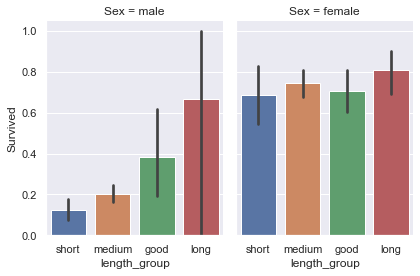

In [714]:
# Plot without Pclass
ax = sns.catplot(x='length_group',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 order=['short', 'medium', 'good', 'long'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

If you're a female then the chances of survival is the highest when you have a long name but they are all very close in terms of survival rate. Males are a whole new story. There is a big right skew. The longer the name the higher chance of survival.

### Create a new title feature

There are a few ways to get the title from the Name feature.

1. Split loop
    - combined['title'] = [i.split('.')[0] for i in combined.Name]
    - combined['title'] = [i.split(',')[1] for i in combined.title]
    - combined['title'] = combined.['title'].map(lambda x: x.strip())
2. Extraction
    - combined.Name.str.extract('([A-Za-z]+\\.)')
        - Groups multiple tokens together and creates a capture group for extracting a substring or using a backreference. 
        - Match any character in the set
            - **A-Z** range: matches a character in the range 'A' to 'Z' (case sensitive)
            - **a-z** range: matches a character in the range 'a' to 'z' (case sensitive)
            - **+**: match 1 or moree of the preceding token
            - **\\.** escaped character: matches a '.' character
    - So basically this looks for any letters before a period character  
3. Use regular expressions and create a function (Extraction)
    - import re
    - def extract_title(name):
    
            title_search = re.search('([A-Za-z]+)\.', name)

            if title_search:

                return title_search.group(1)

            return ""

            titles = combined['Name'].map(extract_title)

            combined['title'] = titles

In [715]:
# Extract title from Name
combined['title'] = combined.Name.str.extract('([A-Za-z]+)\.')

# Check
combined['title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: title, dtype: object

In [716]:
# Let's count the titles
pd.crosstab(combined.title, combined.Sex)

Sex       female  male
title                 
Capt           0     1
Col            0     4
Countess       1     0
Don            0     1
Dona           1     0
Dr             1     7
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    61
Miss         260     0
Mlle           2     0
Mme            1     0
Mr             0   757
Mrs          197     0
Ms             2     0
Rev            0     8
Sir            0     1

We could probably trim down these titles especially the ones less than 10 so they are grouped up so we can use the feature better. Let's create a list of ones that may not fit into the popular titles.

In [717]:
# Create a list
rare_title_list = ['Dona', 'Lady', 'Countess', 'Capt',
                   'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', "Jonkheer"]

female_list = ['Ms, Mlle']

In [718]:
combined[combined['title'].isin(rare_title_list)].title.value_counts()

Dr          8
Rev         8
Col         4
Major       2
Capt        1
Dona        1
Lady        1
Don         1
Sir         1
Countess    1
Jonkheer    1
Name: title, dtype: int64

Another way to replace values besides the logic in the cell below is to use replace method for each title.

1. [i.replace('Ms', 'Miss') for i in combined.title]
2. combined.title.replace(to_replace=['Dr', 'Rev', 'Col', 'Major', 'Capt'], value='Rare', inplace=True)


c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 51.,  21.,  22.,  40., 114., 160., 128., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <a list of 20 Patch objects>)

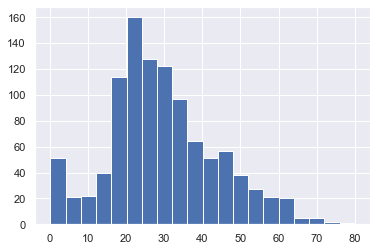

In [719]:
plt.hist(x=combined.Age,
         bins=20)


In [720]:
# Update titles
combined.loc[(combined.title.isin(rare_title_list)), 'title'] = 'Rare'

combined.loc[(combined.title.isin(['Ms', 'Mlle'])), 'title'] = 'Miss'

combined.loc[(combined.title=='Mme'), 'title'] = 'Mrs'

combined.loc[(combined.Age<11), 'title'] = 'Child_10'

# Check
combined.title.value_counts()

Mr          757
Miss        223
Mrs         198
Child_10     86
Rare         29
Master       16
Name: title, dtype: int64

Frequency of title :


Count  Percentage
Mr          757       57.83
Miss        223       17.04
Mrs         198       15.13
Child_10     86        6.57
Rare         29        2.22
Master       16        1.22

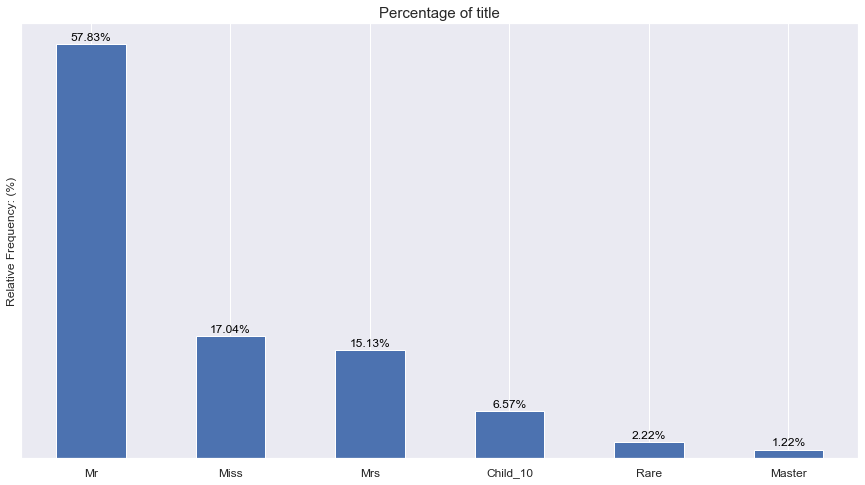

In [721]:
# Plot & table
freq_table(combined.title)

Text(8.96, 0.5, 'Survival Rate')

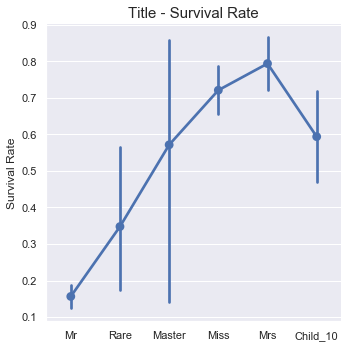

In [722]:
# Create a factor plot
sns.catplot(x='title',
            y='Survived',
            data=combined,
            kind='point',
            order=['Mr', 'Rare', 'Master', 'Miss', 'Mrs', 'Child_10'])

# Set plot features
plt.title('Title - Survival Rate', fontsize=15)
plt.xlabel('')
plt.ylabel('Survival Rate', fontsize=12)

In [723]:
# Let's look at Pclass and title together
pclass_title_survived = pd.crosstab(index=combined.Survived,
                                    columns=[combined.Pclass, combined.title],
                                    margins=True)

pclass_title_survived.index = ['Did not Survive', 'Survived', 'ColTotal']

round(pclass_title_survived/pclass_title_survived.loc['ColTotal']*100,1)

Pclass                 1                                           2         \
title           Child_10 Master   Miss     Mr    Mrs   Rare Child_10   Miss   
Did not Survive     33.3    0.0    2.1   65.4    2.3   46.7      0.0    7.4   
Survived            66.7  100.0   97.9   34.6   97.7   53.3    100.0   92.6   
ColTotal           100.0  100.0  100.0  100.0  100.0  100.0    100.0  100.0   

Pclass                                      3                              \
title               Mr    Mrs   Rare Child_10 Master   Miss     Mr    Mrs   
Did not Survive   91.2    9.8  100.0     56.8   50.0   50.0   88.7   50.0   
Survived           8.8   90.2    0.0     43.2   50.0   50.0   11.3   50.0   
ColTotal         100.0  100.0  100.0    100.0  100.0  100.0  100.0  100.0   

Pclass             All  
title                   
Did not Survive   61.6  
Survived          38.4  
ColTotal         100.0

I would have thought that people with Rare titles would have a higher survival rate just based on their original titles before the change. Breaking it down in the table helps as well so we can see where there is a high survival rate vs. low compared to looking at the aggregated view. Females are dominant as usual with the lowest survival % at 50 with a Pclass of 3.

### Create a new feature called family_size

I'm going to assume that the larger the family size the smaller the survival rate. To get the family size you need to add the Parch and SibSp features together + the individual (1).

In [724]:
combined['family_size'] = combined.Parch + combined.SibSp + 1

# Check
combined.family_size.head()

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64

In [725]:
# Check counts
fam_cnt = combined.family_size.value_counts()
fam_pct = round(combined.family_size.value_counts(normalize=True)*100,1)

# Create table
pd.concat([fam_cnt, fam_pct], axis=1, keys=['Total', 'Percent'])

Total  Percent
1     790     60.4
2     235     18.0
3     159     12.1
4      43      3.3
6      25      1.9
5      22      1.7
7      16      1.2
11     11      0.8
8       8      0.6

### Create a new feature to group family

In [726]:
# Create a function to group family_size
def create_family_size_group(size):
    text=''
    if size<=1:
        text='single'
    elif size<=4:
        text='small'
    else:
        text='large'
    return text

# Create feature
combined['family_group'] = combined.family_size.map(create_family_size_group)

# Check
combined.family_group.head()

0     small
1     small
2    single
3     small
4    single
Name: family_group, dtype: object

Frequency of family_group :


Count  Percentage
single    790       60.35
small     437       33.38
large      82        6.26

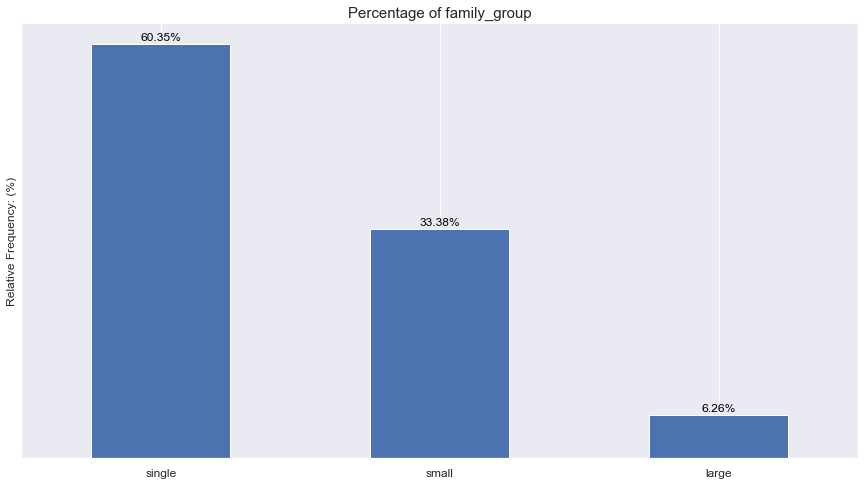

In [727]:
# Plot & table
freq_table(combined.family_group)

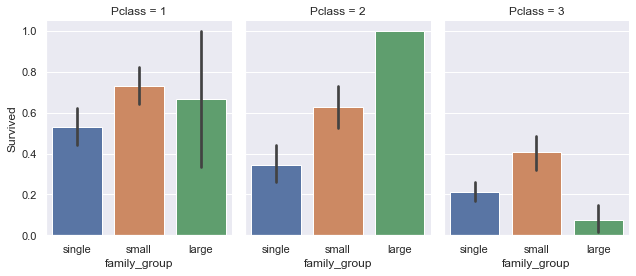

In [728]:
# Plot without Pclass
ax = sns.catplot(x='family_group',
                 y='Survived',
                 col='Pclass',
                 data=combined,
                 order=['single', 'small', 'large'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

### Create a new feature called is_alone which is basically a flag indicating if the person came alone

In [729]:
combined['is_alone'] = [1 if i<2 else 0 for i in combined.family_size]

# Check
combined.is_alone.head()

0    0
1    0
2    1
3    0
4    1
Name: is_alone, dtype: int64

### Average fare

In [730]:
combined['fare_avg'] = combined.Fare/combined.family_size

# Check
combined.iloc[:,-3:].head()

family_group  is_alone  fare_avg
0        small         0   3.62500
1        small         0  35.64165
2       single         1   7.92500
3        small         0  26.55000
4       single         1   8.05000

### Create a new feature called fare_group

In [731]:
def create_fare_group(fare):
    text=''
    if fare<4:
        text='very low'
    elif fare<=10:
        text='low'
    elif fare<=20:
        text='mid'
    elif fare<=45:
        text='high'
    else:
        text='rich'
    return text

# Call function on dataset
combined['fare_group'] = combined.Fare.map(create_fare_group)

# Check
combined.iloc[:,-3:].head()

is_alone  fare_avg fare_group
0         0   3.62500        low
1         0  35.64165       rich
2         1   7.92500        low
3         0  26.55000       rich
4         1   8.05000        low

In [732]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'CabinValue', 'Gender',
       'name_length', 'length_group', 'title', 'family_size', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

### Statistical analysis

In [733]:
combined.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.280089     0.385027   655.000000     2.294882   
std      14.413493    51.741875     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived       Gender  name_length  family_size  \
count  1309.000000  891.000000  1309.000000  1309.000000  1309.000000   
mean      0.498854    0.383838     0.644003    27.130634     1.883881   
std       1.041658    0.486592     0.478997     9.506503     1.583639   
min       0.000000    0.000000     0.000000    12.000000     1.000000   
25%       0.000000    0.000000     0.000000    20.000000     1.000000   
50%       0.000000    0.000000     1.000000    25.000000     1.000000   
75%       1.000000    1.000000     1.000000    30.000000     2.000000   
max       8.000000    1.000000     1.000000    82.000000    11.000000   

          is_alone     fare_avg  
count  1309.000000  1309.000000  
mean      0.603514    20.512586  
std       0.489354    35.761239  
min       0.000000     0.000000  
25%       0.000000     7.452767  
50%       1.000000     8.566667  
75%       1.000000    24.150000  
max       1.000000   512.329200

In [734]:
### Describe only numerical columns

In [735]:
combined.describe(include=np.number)

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.280089     0.385027   655.000000     2.294882   
std      14.413493    51.741875     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived       Gender  name_length  family_size  \
count  1309.000000  891.000000  1309.000000  1309.000000  1309.000000   
mean      0.498854    0.383838     0.644003    27.130634     1.883881   
std       1.041658    0.486592     0.478997     9.506503     1.583639   
min       0.000000    0.000000     0.000000    12.000000     1.000000   
25%       0.000000    0.000000     0.000000    20.000000     1.000000   
50%       0.000000    0.000000     1.000000    25.000000     1.000000   
75%       1.000000    1.000000     1.000000    30.000000     2.000000   
max       8.000000    1.000000     1.000000    82.000000    11.000000   

          is_alone     fare_avg  
count  1309.000000  1309.000000  
mean      0.603514    20.512586  
std       0.489354    35.761239  
min       0.000000     0.000000  
25%       0.000000     7.452767  
50%       1.000000     8.566667  
75%       1.000000    24.150000  
max       1.000000   512.329200

### Use groupby to get survival rates

In [736]:
combined[['Pclass','Survived']].groupby('Pclass').mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [737]:
combined[['family_group','Survived']].groupby('family_group').mean()

Survived
family_group          
large         0.161290
single        0.303538
small         0.578767

### Survival across features

In [738]:
# Get overview by using all features
survived_summary = combined.groupby('Survived')
survived_summary.mean().reset_index()

Survived        Age       Fare     Parch  PassengerId    Pclass     SibSp  \
0       0.0  30.626179  22.117887  0.329690   447.016393  2.531876  0.553734   
1       1.0  28.343690  48.395408  0.464912   444.368421  1.950292  0.473684   

     Gender  name_length  family_size  is_alone   fare_avg  
0  0.852459    24.531876     1.883424  0.681239  13.651162  
1  0.318713    30.871345     1.938596  0.476608  29.973691

### Correlations

In [739]:
pd.DataFrame(abs(combined.corr()['Survived']).sort_values(ascending=False))

Survived
Survived     1.000000
Gender       0.543351
Pclass       0.338481
name_length  0.332350
Fare         0.257307
fare_avg     0.221600
is_alone     0.203367
Parch        0.081629
Age          0.077221
SibSp        0.035322
family_size  0.016639
PassengerId  0.005007

Gender has the highest correlation based off of the pearson's correlation which is the standard correlation coefficient. The second is Pclass, which makes sense where location and status can be a large factor.

- in statistics, the correlation coefficient r measures the strength and direction of a linear relationship. don't get this mixed upwith coefficient of determination which is the r^2 which shows percentage of variation in y which is explained by the x variables.
    - when Pearson's r is close to 1 that means there is a strong relationship between the two variables
    - when Pearson's r is close to 0 that means there is a weak relationship between the two variables


# Let's get R-squared (Coefficient of Determination)

In [740]:
# Top features
corr = combined.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Gender         0.295231
Pclass         0.114569
name_length    0.110456
Fare           0.066207
fare_avg       0.049107
is_alone       0.041358
Parch          0.006663
Age            0.005963
SibSp          0.001248
family_size    0.000277
PassengerId    0.000025
Name: Survived, dtype: float64

The coefficient of determination provides a 'goodness of fit' measure for the predictions to the observations. This is a value between 0 and 1. Basically it's the proportion of the variance in the dependent variable (y) that is predictable from the independent variable (x).

### Create a heatmap

Text(0.5, 1.05, 'Feature Correlations')

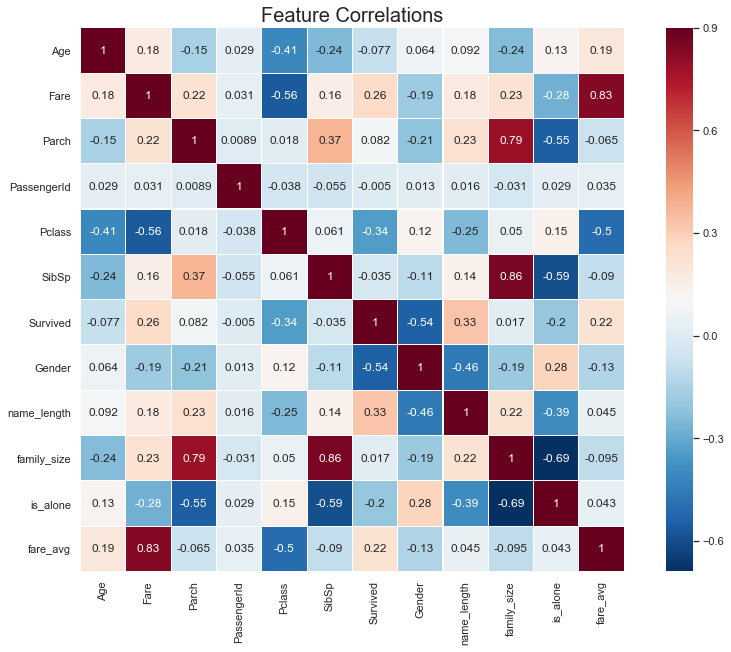

In [741]:
# Create figure space
plt.subplots(figsize=(15,10))

# Create matrix
sns.heatmap(combined.corr(),
            annot=True,
            cmap='RdBu_r',
            linewidths=0.10,
            linecolor='white',
            vmax=0.90,
            square=True)

# Set plot features
plt.title('Feature Correlations', y=1.05, fontsize=20)

### Statistical Test for Correlation

#### Hypothesis Testing

A statistical test which compares the mean of two groups and tries to find out whether the two sample means are different form each other and if they are different, how significantly that difference is. 

In other words, all hypothesis testing is asking is: does our evidence make the null hypothesis (what the world may look like) look ridiculous. If so, we choose the alternative hypothesis (all other situations). 

Rejecting the null hypothesis means that we learned something and we should change our minds. Not rejecting the null means that we learned nothing intersting that may change our minds which is determined by the p-value (probability of getting at least something as bad as the world we are trying to prove (alternative)). 

#### Steps to take in a hypothesis test:
1. Formulate a well-developed research problem or question (like any other problems we attempt to answer)
2. What is the null hypothesis and what is the alternative hypothesis? What's our sample size? What is a big enough sample size needed to make sure the test we are performing will be significant? This could be determined by power, which asks us did we do our homework (Cassie K.)? Power analysis is a way to check how much power you need.
3. Determine the test statistic. Usually this is determined by the type of test we are performing and if it's one-tailed or two-tailed.
4. Specify the significance level (risk tolerated). Alpha is the probability of rejecting the null when it is true, in other words, we are confidence with rejecting the null at this level. 
5. Compute test statistic.
6. Compute the p-value. The smaller the value, the stronger the evidence that there is something interesting going on and we should take a look.
7. Communicate the result. Are we rejecting the null or failing to accept the null? Is there going to be a change?

#### Titanic: Hypothesis Test

1. Is there a significant difference in the mean sex between passengers who survived and who didn't survive?
2. Hypothesis
    - Ho = No difference in the survival rate between the male and female passengers
    - Ha = There is a difference in the survival rate between the male and female passengers
3. Two-tailed test since the difference between male and female passenger in the survival rate could be higher or lower than 4. Since we do not know the standard deviation and n is small, we will use the t-distribution.
5. Compute statistic
6. Compute p-value
7. Result

### Random sampling between Gender

Take 50 random samples of males and females

In [742]:
# Split the genders into two populations
males = combined[(combined.Gender==1) & combined.Survived.notnull()]
females = combined[(combined.Gender==0) & combined.Survived.notnull()]

# Get 50 random samples using the random module
import random
male_sample = random.sample(list(males.Survived), 50)
female_sample = random.sample(list(females.Survived), 50)

# Get sample means
male_sample_mean = np.mean(male_sample)
female_sample_mean = np.mean(female_sample)

# Print results
print ("Male sample mean: " + str(male_sample_mean))
print ("Female sample mean: " + str(female_sample_mean))
print ("Difference between male and female sample mean: " + str(female_sample_mean - male_sample_mean))

Male sample mean: 0.18
Female sample mean: 0.74
Difference between male and female sample mean: 0.56


### Perform an indepdendent t-test

In [743]:
import scipy.stats as stats
ttest_result = stats.ttest_ind(male_sample, female_sample)

# Get p-value
print('This is the p-value when we use the standard form: ' + format(ttest_result.pvalue, '.32f'))

This is the p-value when we use the standard form: 0.00000000119190793620227649290221


### Result

The p-value is so low, which indicates a large significance in the genders. The observation is therefore significant and we reject the null hypothesis. There is a significant differnces between males and females in survival rates.

### More  Feature Engineering

Feature engineering can make or break your model sometimes. With poor features as inputs, your model will not be good. This particular section can also bring out the more creative side in creating extra features that may be helpful. We could combine certain features together, grouped features, etc. 

But be careful of multicollinearity as we don't want that. Multicollinearity is when there is a strong relationship among independent variables. This could be bad for your model as it will bring it more bias if two variables are similar, we would only want to use the best one.

### Create a new feature called name_length

Create a new feature name_length that will count the letters of each name. This is a new one. I've never tried this one before when I was working on this in R.

In [744]:
# Loop through name
combined['name_length'] = [len(i) for i in combined.Name]

# Define a new function to group name lengths
def create_name_length_group(length):
    grp_name=''
    if length<=20:
        grp_name='short'
    elif length<=35:
        grp_name='medium'
    elif length<=45:
        grp_name='good'
    else:
        grp_name='long'
    return grp_name

# Use map(func, iter) on the data
combined['name_length_group'] = combined.name_length.map(create_name_length_group)

# Check
combined.iloc[:,-3:].head()

fare_avg fare_group name_length_group
0   3.62500        low            medium
1  35.64165       rich              long
2   7.92500        low            medium
3  26.55000       rich              good
4   8.05000        low            medium

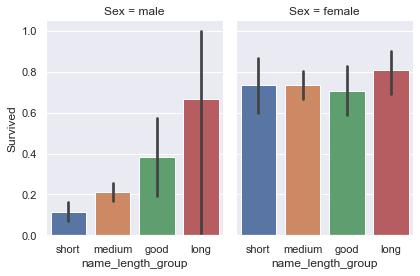

In [745]:
# Plot
ax = sns.catplot(x='name_length_group',
                 y='Survived',
                 col='Sex',
                 data=combined,
                 order=['short', 'medium', 'good', 'long'],
                 kind='bar',
                 height=4,
                 aspect=0.75)

In [746]:
# Already made the feature
combined.drop(['name_length_group'], axis=1, inplace=True)

### Drop any features before we create dummy variables

Drop any columns we are not inputting into the model including the numerical ones if we are using grouped features.

In [747]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'CabinValue', 'Gender',
       'name_length', 'length_group', 'title', 'family_size', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

In [748]:
# Create a copy just in case we want to revert
combined_copy = combined.copy()

# Drop features
combined.drop(['Name', 'Parch', 'PassengerId', 'SibSp', 'Sex', 'Ticket', 'family_size', 'name_length'], axis=1, inplace=True)

In [749]:
combined.columns

Index(['Age', 'DataType', 'Embarked', 'Fare', 'Pclass', 'Survived',
       'CabinValue', 'Gender', 'length_group', 'title', 'family_group',
       'is_alone', 'fare_avg', 'fare_group'],
      dtype='object')

### Dummy Variables

Dummy variables is an important pre-processing step. It's usually used when important features are not numerical so we have to transform them into binary values 0 or 1. Many models would prefer or need numerical features to be used in order for it to work properly. While working with a dataset, we want to make sure the computer is able to understand the differences. Computer processing power is also a lot better with straight numbers, vectors, or anything numer related vs strings/text/categorical.

To transform variables in Python, we must use pandas.get_dummies() function. In R, it's similar to model_matrix(~y). This will produce sparse columns which will grow horizontally and can get exponentially more difficult as we have to search through more dimensions.

In [750]:
# Create a list of features for dummy
dummy_list = ['Embarked', 'CabinValue', 'length_group', 'title', 'family_group', 'fare_group']

model_data = pd.get_dummies(combined,
                            columns=dummy_list,
                            drop_first=False)

In [753]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function that takes a dataframe with missing values and outputs it with filled values
def complete_age(df):
    # Get features except Survived since Age is to the right of Survived
    feature_list = ['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'name_length', 'title', 'family_size', 'is_alone', 'fare_avg']
    age_df = df.loc[:, 'Age':]

    # Get Age nulls and non-nuls
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]
    
    # Set target variable: age
    y = temp_train.Age.values
    x = temp_train.loc[:, 'Gender':].values
    
    # Use RandomForestRegressor(n_estimators, n_jobs)
    rf = RandomForestRegressor(n_estimators=1500, n_jobs=1)
    rf.fit(x, y)
    
    # Predict
    predicted_age = rf.predict(temp_test.loc[:, 'Gender':])
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

In [754]:
# Use the new functions on the dataset
complete_age(model_data)

Age DataType      Fare  Pclass  Survived  Gender  is_alone  \
0    22.000000    Train    7.2500       3       0.0       1         0   
1    38.000000    Train   71.2833       1       1.0       0         0   
2    26.000000    Train    7.9250       3       1.0       0         1   
3    35.000000    Train   53.1000       1       1.0       0         0   
4    35.000000    Train    8.0500       3       0.0       1         1   
5    29.295503    Train    8.4583       3       0.0       1         1   
6    54.000000    Train   51.8625       1       0.0       1         1   
7     2.000000    Train   21.0750       3       0.0       1         0   
8    27.000000    Train   11.1333       3       1.0       0         0   
9    14.000000    Train   30.0708       2       1.0       0         0   
10    4.000000    Train   16.7000       3       1.0       0         0   
11   58.000000    Train   26.5500       1       1.0       0         1   
12   20.000000    Train    8.0500       3       0.0       1         1   
13   39.000000    Train   31.2750       3       0.0       1         0   
14   14.000000    Train    7.8542       3       0.0       0         1   
15   55.000000    Train   16.0000       2       1.0       0         1   
16    2.000000    Train   29.1250       3       0.0       1         0   
17   31.990802    Train   13.0000       2       1.0       1         1   
18   31.000000    Train   18.0000       3       0.0       0         0   
19   39.929994    Train    7.2250       3       1.0       0         1   
20   35.000000    Train   26.0000       2       0.0       1         1   
21   34.000000    Train   13.0000       2       1.0       1         1   
22   15.000000    Train    8.0292       3       1.0       0         1   
23   28.000000    Train   35.5000       1       1.0       1         1   
24    8.000000    Train   21.0750       3       0.0       0         0   
25   38.000000    Train   31.3875       3       1.0       0         0   
26   28.997014    Train    7.2250       3       0.0       1         1   
27   19.000000    Train  263.0000       1       0.0       1         0   
28   19.189325    Train    7.8792       3       1.0       0         1   
29   27.988688    Train    7.8958       3       0.0       1         1   
..         ...      ...       ...     ...       ...     ...       ...   
388  21.000000     Test    7.7500       3       NaN       1         1   
389   6.000000     Test   21.0750       3       NaN       1         0   
390  23.000000     Test   93.5000       1       NaN       1         1   
391  51.000000     Test   39.4000       1       NaN       0         0   
392  13.000000     Test   20.2500       3       NaN       1         0   
393  47.000000     Test   10.5000       2       NaN       1         1   
394  29.000000     Test   22.0250       3       NaN       1         0   
395  18.000000     Test   60.0000       1       NaN       0         0   
396  24.000000     Test    7.2500       3       NaN       1         1   
397  48.000000     Test   79.2000       1       NaN       0         0   
398  22.000000     Test    7.7750       3       NaN       1         1   
399  31.000000     Test    7.7333       3       NaN       1         1   
400  30.000000     Test  164.8667       1       NaN       0         1   
401  38.000000     Test   21.0000       2       NaN       1         0   
402  22.000000     Test   59.4000       1       NaN       0         0   
403  17.000000     Test   47.1000       1       NaN       1         1   
404  43.000000     Test   27.7208       1       NaN       1         0   
405  20.000000     Test   13.8625       2       NaN       1         1   
406  23.000000     Test   10.5000       2       NaN       1         0   
407  50.000000     Test  211.5000       1       NaN       1         0   
408  20.295867     Test    7.7208       3       NaN       0         1   
409   3.000000     Test   13.7750       3       NaN       0         0   
410  24.247123     Test    7.7500       3       NaN       0         1

In [756]:
model_data.isnull().sum()

Age                      0
DataType                 0
Fare                     0
Pclass                   0
Survived               418
Gender                   0
is_alone                 0
fare_avg                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
CabinValue_A             0
CabinValue_B             0
CabinValue_C             0
CabinValue_D             0
CabinValue_E             0
CabinValue_F             0
CabinValue_G             0
CabinValue_T             0
length_group_good        0
length_group_long        0
length_group_medium      0
length_group_short       0
title_Child_10           0
title_Master             0
title_Miss               0
title_Mr                 0
title_Mrs                0
title_Rare               0
family_group_large       0
family_group_single      0
family_group_small       0
fare_group_high          0
fare_group_low           0
fare_group_mid           0
fare_group_rich          0
fare_group_very low      0
d

### Plot Age distribution

c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\david ly\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Pre-Model Age Distribution')

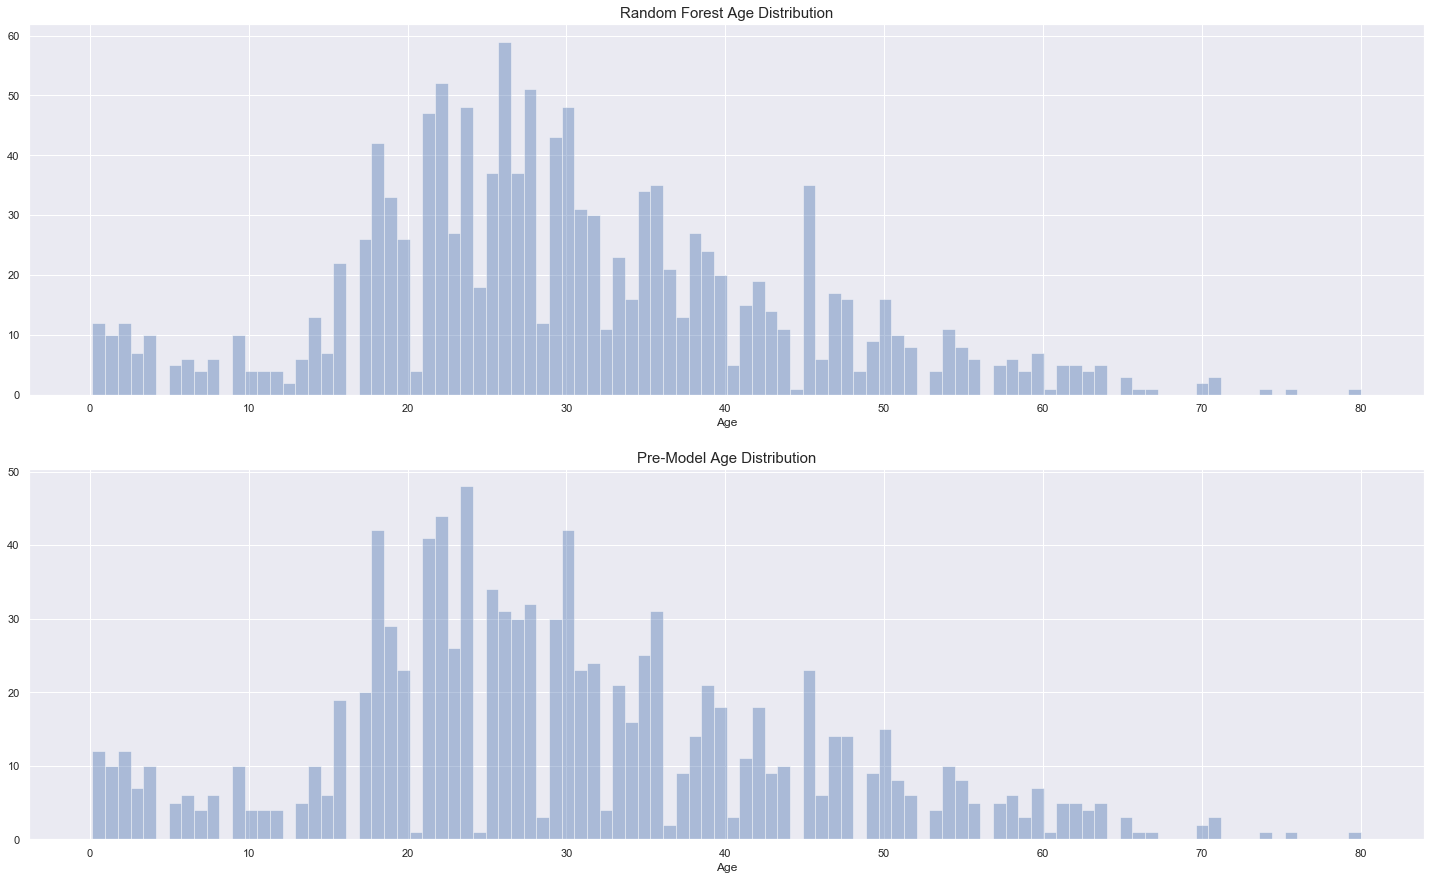

In [757]:
# Create figure space
fig, ax = plt.subplots(figsize=(25,15), ncols=1, nrows=2)

# Create distribution plot with sns.distplot()
ax1 = sns.distplot(model_data.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[0])
ax2 = sns.distplot(combined.Age, bins=100, kde=False, rug=False, norm_hist=False, ax=ax[1])

# Set titles
ax1.set_title('Random Forest Age Distribution', fontsize=15)
ax2.set_title('Pre-Model Age Distribution', fontsize=15)

### Create an Age group bin feature
Follow all the steps above and write them altogether
1. define the function
2. apply the function to the datasets
3. create dummy variables
4. drop the un-needed features (age)

In [758]:
# Create a function to group ages
def create_age_group(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

# Apply using the map function
model_data['age_group'] = model_data['Age'].map(create_age_group)

# Create dummies
model_data = pd.get_dummies(model_data, columns=['age_group'], drop_first=True)

# Drop columns
model_data.drop('Age', axis=1, inplace=True)

# Check 
model_data.head()

DataType     Fare  Pclass  Survived  Gender  is_alone  fare_avg  Embarked_C  \
0    Train   7.2500       3       0.0       1         0   3.62500           0   
1    Train  71.2833       1       1.0       0         0  35.64165           1   
2    Train   7.9250       3       1.0       0         1   7.92500           0   
3    Train  53.1000       1       1.0       0         0  26.55000           0   
4    Train   8.0500       3       0.0       1         1   8.05000           0   

   Embarked_Q  Embarked_S  ...  fare_group_rich  fare_group_very low  \
0           0           1  ...                0                    0   
1           0           0  ...                1                    0   
2           0           1  ...                0                    0   
3           0           1  ...                1                    0   
4           0           1  ...                0                    0   

   age_group_adult  age_group_child  age_group_infant  age_group_middle_aged  \
0                0                0                 0                      0   
1                1                0                 0                      0   
2                0                0                 0                      0   
3                0                0                 0                      0   
4                0                0                 0                      0   

   age_group_old  age_group_senior_citizen  age_group_teenager  \
0              0                         0                   0   
1              0                         0                   0   
2              0                         0                   0   
3              0                         0                   0   
4              0                         0                   0   

   age_group_toddler  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 44 columns]

### Pre-Modeling Tasks
________________________________________________________________________________________

1. Separate dependent and independent variables
2. Split the training data
3. Feature scaling
4. Modeling the data

In [778]:
# Drop DataType
model_data.drop('DataType', axis=1, inplace=True)

# Split model_data
train = model_data[1:891]
test = model_data[892:model_data.shape[0]]

print('Train data shape: ' + str(train.shape))
print('Test data shape: ' + str(test.shape))

Train data shape: (890, 43)
Test data shape: (417, 43)


In [779]:
# Split the variables
y = train['Survived']
X = train.drop(['Survived'], axis=1)

Split the training data for cross-validation

Split the train data into 4 parts, train_x, test_x, train_y, test_y

    train_x and train_y first used to train the algorithm.
    then, test_x is used in that trained algorithms to predict outcomes.
    Once we get the outcomes, we compare it with test_x


In [786]:
# Import split module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Check
X_train.head(3)

Fare  Pclass  Gender  is_alone  fare_avg  Embarked_C  Embarked_Q  \
346  13.000       2       0         1    13.000           0           0   
243   7.125       3       1         1     7.125           0           0   
345  13.000       2       0         1    13.000           0           0   

     Embarked_S  CabinValue_A  CabinValue_B  ...  fare_group_rich  \
346           1             0             0  ...                0   
243           1             0             0  ...                0   
345           1             0             0  ...                0   

     fare_group_very low  age_group_adult  age_group_child  age_group_infant  \
346                    0                1                0                 0   
243                    0                0                0                 0   
345                    0                0                0                 0   

     age_group_middle_aged  age_group_old  age_group_senior_citizen  \
346                      0              0                         0   
243                      0              0                         0   
345                      0              0                         0   

     age_group_teenager  age_group_toddler  
346                   0                  0  
243                   0                  0  
345                   0                  0  

[3 rows x 42 columns]

### Feature scaling

This is an important concept and it has several methods to achieve this. Since numbers are not in the same scale and can have large effects where the model will read a higher number as better when it is actually not... and more issues. So we need to do feature scaling to get a better result.

**Types of Scalers**
- **MinMaxScaler** - Scales the data using the max and min values so that it fits between 0 and 1.
- **StandardScaler** - Scales the data so that it has mean 0 and variance of 1.
- **RobustScaler** - Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.

Call the StandardScaler() function
1. Use fit_transform() to scale the data
2. Use transform() on all other datasets that will be used


### Reshaping

In [787]:
# Get train headers
headers = X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Scale the data

In [788]:
# Import StandardScaler() from the preprocessing module
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transform the variables to be on the same scale
X_train = scaler.fit_transform(X_train) # 1. fit_transform(training data)
X_test = scaler.transform(X_test)       # 2. transform(testing data)

# Transform the test(data) as well
ytest = test['Survived']
Xtest = test.drop(['Survived'], axis=1)
Xtest = scaler.transform(Xtest)

### Modeling the data

#### List of some classification models:
    
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Bagging on Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

### Creating functions for the modeling process

Will go over some of the model after step by step.

In [798]:
# Set seed
seed = 150

'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 500)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

'''#9.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)

'''#10.Extreme Gradient Boosting'''
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state = seed)

'''Create a function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy


# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    # execute code that will generate warnings
    
    '''Models with best training accuracy:'''
    train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(gnb), train_accuracy(dt), train_accuracy(gbc), train_accuracy(abc), train_accuracy(etc), train_accuracy(xgbc)]})
    train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC', 'ETC', 'XGBC']
    sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

print('**Training Accuracy of the Classifiers:**')
display(sorted_train_accuracy)



**Training Accuracy of the Classifiers:**


Train_accuracy(%)
RF                96.14
DT                96.14
ETC               96.14
GBC               92.11
XGBC              89.77
SVC               87.92
KNN               87.08
ABC               86.24
LR                84.90
GNB               70.47